<div class="alert alert-block alert-info" style="margin-top: 20px">

<a id = "Table_of_content"></a>
# Table of content
### 1. [Terrain num](#T1)
### 2. [Valid move](#T2)
### 3. [12 Part of Observation](#T3)
### 4. [Environment class](#T4)
### 5. [Generate environment](#T5)
### 6. [CNN](#T6)
#### &emsp; ---➤ [Function for Training](#T61)
#### &emsp; ---➤ [Training](#T51)
#### &emsp; ---➤ [Evaluating](#T52)
### 7. [Participating the competition](#T7)
</div>

# Import all require library

In [2]:
# Import all required library
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
from torch.optim import Adam
import torch.nn.functional as F
import os
import pandas as pd

<a id = "T1"></a></a><div style="text-align: right"> <a href=#Table_of_content>Back?</a> </div>
## Terrain num
|Num|Terrain|
|:-:|:-:|
|0|Obstacle 'W'|
|1|Land '.'|
|2|Starting point(S)|
|3|Target (T)|
|4|battle fog/unknown terrain|

<a id = "T2"></a></a><div style="text-align: right"> <a href=#Table_of_content>Back?</a> </div>
## Valid Move 
|Index|Move|
|:-:|:-:|
|0|Right|
|1|Right Up|
|2|Up|
|3|Left Up|
|4|Left|
|5|Left Down|
|6|Down|
|7|Right Down|

<a id = "T3"></a></a><div style="text-align: right"> <a href=#Table_of_content>Back?</a> </div>
## 12 Part of Observation
* The 21x21 observation is seperated into 12 part 
  - top, bottom, left right
  - top left up, top left down
  - top right up, top right down
  - botton left up, bottom left down
  - botton right up, bottom right down
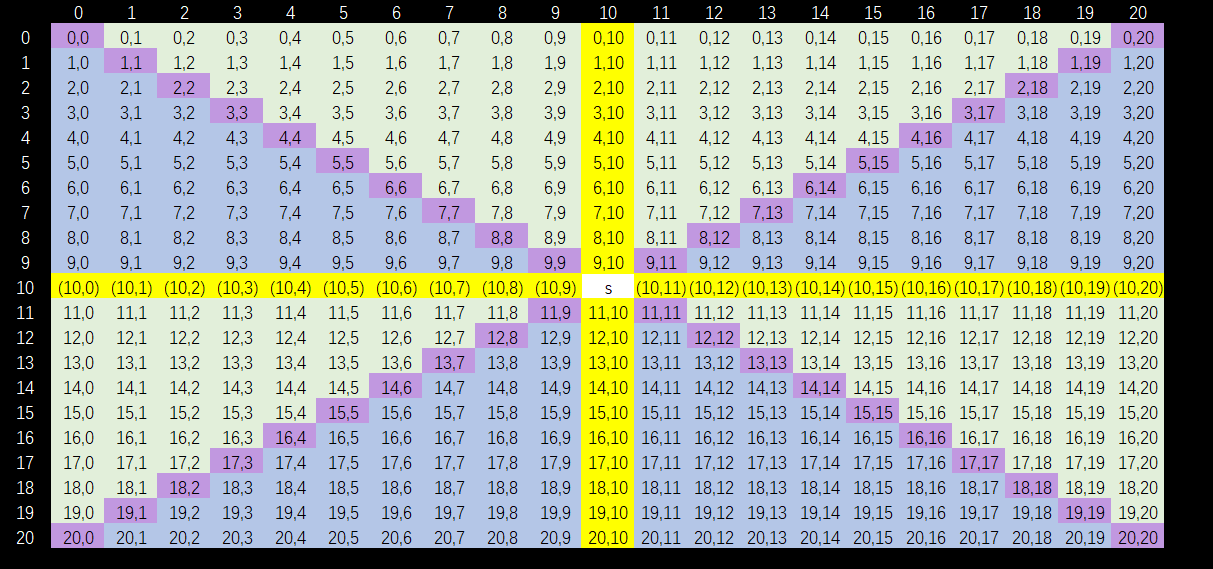

In [3]:
top            =((0,10),(1,10),(2,10),(3,10),(4,10),(5,10),(6,10),(7,10),(8,10),(9,10))
        
bottom         =((11,10),(12,10),(13,10),(14,10),(15,10),(16,10),(17,10),(18,10),(19,10),(20,10))

left           =((10,0),(10,1),(10,2),(10,3),(10,4),(10,5),(10,6),(10,7),(10,8),(10,9))
        
right          =((10,11),(10,12),(10,13),(10,14),(10,15),(10,16),(10,17),(10,18),(10,19),(10,20))

top_left_up   = ((0,0), (0,1), (0,2), (0,3), (0,4), (0,5), (0,6), (0,7), (0,8), (0,9), 
                        (1,1), (1,2), (1,3), (1,4), (1,5), (1,6), (1,7), (1,8), (1,9), 
                               (2,2), (2,3), (2,4), (2,5), (2,6), (2,7), (2,8), (2,9), 
                                      (3,3), (3,4), (3,5), (3,6), (3,7), (3,8), (3,9), 
                                             (4,4), (4,5), (4,6), (4,7), (4,8), (4,9), 
                                                    (5,5), (5,6), (5,7), (5,8), (5,9), 
                                                           (6,6), (6,7), (6,8), (6,9), 
                                                                  (7,7), (7,8), (7,9), 
                                                                         (8,8), (8,9), 
                                                                                (9,9))
top_left_down =((0,0), 
                (1,0), (1,1), 
                (2,0), (2,1), (2,2), 
                (3,0), (3,1), (3,2), (3,3), 
                (4,0), (4,1), (4,2), (4,3), (4,4), 
                (5,0), (5,1), (5,2), (5,3), (5,4), (5,5), 
                (6,0), (6,1), (6,2), (6,3), (6,4), (6,5), (6,6), 
                (7,0), (7,1), (7,2), (7,3), (7,4), (7,5), (7,6), (7,7), 
                (8,0), (8,1), (8,2), (8,3), (8,4), (8,5), (8,6), (8,7), (8,8), 
                (9,0), (9,1), (9,2), (9,3), (9,4), (9,5), (9,6), (9,7), (9,8), (9,9))
        

top_right_up = ((0,11), (0,12), (0,13), (0,14), (0,15), (0,16), (0,17), (0,18), (0,19), (0,20), 
                (1,11), (1,12), (1,13), (1,14), (1,15), (1,16), (1,17), (1,18), (1,19), 
                (2,11), (2,12), (2,13), (2,14), (2,15), (2,16), (2,17), (2,18), 
                (3,11), (3,12), (3,13), (3,14), (3,15), (3,16), (3,17), 
                (4,11), (4,12), (4,13), (4,14), (4,15), (4,16), 
                (5,11), (5,12), (5,13), (5,14), (5,15), 
                (6,11), (6,12), (6,13), (6,14), 
                (7,11), (7,12), (7,13), 
                (8,11), (8,12), 
                (9,11))
        
top_right_down=(                                                                        (0,20), 
                                                                                (1,19), (1,20), 
                                                                        (2,18), (2,19), (2,20), 
                                                                (3,17), (3,18), (3,19), (3,20), 
                                                        (4,16), (4,17), (4,18), (4,19), (4,20), 
                                                (5,15), (5,16), (5,17), (5,18), (5,19), (5,20), 
                                        (6,14), (6,15), (6,16), (6,17), (6,18), (6,19), (6,20), 
                                (7,13), (7,14), (7,15), (7,16), (7,17), (7,18), (7,19), (7,20), 
                        (8,12), (8,13), (8,14), (8,15), (8,16), (8,17), (8,18), (8,19), (8,20), 
                (9,11), (9,12), (9,13), (9,14), (9,15), (9,16), (9,17), (9,18), (9,19), (9,20))
        

bot_left_up  = ((11,0), (11,1), (11,2), (11,3), (11,4), (11,5), (11,6), (11,7), (11,8), (11,9), 
                (12,0), (12,1), (12,2), (12,3), (12,4), (12,5), (12,6), (12,7), (12,8), 
                (13,0), (13,1), (13,2), (13,3), (13,4), (13,5), (13,6), (13,7), 
                (14,0), (14,1), (14,2), (14,3), (14,4), (14,5), (14,6), 
                (15,0), (15,1), (15,2), (15,3), (15,4), (15,5), 
                (16,0), (16,1), (16,2), (16,3), (16,4), 
                (17,0), (17,1), (17,2), (17,3), 
                (18,0), (18,1), (18,2), 
                (19,0), (19,1), 
                (20,0))      
bot_left_down= (                                                                        (11,9), 
                                                                                (12,8), (12,9), 
                                                                        (13,7), (13,8), (13,9), 
                                                                (14,6), (14,7), (14,8), (14,9), 
                                                        (15,5), (15,6), (15,7), (15,8), (15,9), 
                                                (16,4), (16,5), (16,6), (16,7), (16,8), (16,9), 
                                        (17,3), (17,4), (17,5), (17,6), (17,7), (17,8), (17,9), 
                                (18,2), (18,3), (18,4), (18,5), (18,6), (18,7), (18,8), (18,9), 
                        (19,1), (19,2), (19,3), (19,4), (19,5), (19,6), (19,7), (19,8), (19,9), 
                (20,0), (20,1), (20,2), (20,3), (20,4), (20,5), (20,6), (20,7), (20,8), (20,9),)
        

bot_right_up   = ((11,11), (11,12), (11,13), (11,14), (11,15), (11,16), (11,17), (11,18), (11,19), (11,20), 
                           (12,12), (12,13), (12,14), (12,15), (12,16), (12,17), (12,18), (12,19), (12,20), 
                                    (13,13), (13,14), (13,15), (13,16), (13,17), (13,18), (13,19), (13,20), 
                                             (14,14), (14,15), (14,16), (14,17), (14,18), (14,19), (14,20), 
                                                      (15,15), (15,16), (15,17), (15,18), (15,19), (15,20), 
                                                               (16,16), (16,17), (16,18), (16,19), (16,20), 
                                                                        (17,17), (17,18), (17,19), (17,20), 
                                                                                 (18,18), (18,19), (18,20), 
                                                                                          (19,19), (19,20), 
                                                                                                   (20,20))      
bot_right_down=((11,11), 
                (12,11), (12,12), 
                (13,11), (13,12), (13,13), 
                (14,11), (14,12), (14,13), (14,14), 
                (15,11), (15,12), (15,13), (15,14), (15,15), 
                (16,11), (16,12), (16,13), (16,14), (16,15), (16,16), 
                (17,11), (17,12), (17,13), (17,14), (17,15), (17,16), (17,17), 
                (18,11), (18,12), (18,13), (18,14), (18,15), (18,16), (18,17), (18,18), 
                (19,11), (19,12), (19,13), (19,14), (19,15), (19,16), (19,17), (19,18), (19,19), 
                (20,11), (20,12), (20,13), (20,14), (20,15), (20,16), (20,17), (20,18), (20,19), (20,20))

<a id = "T4"></a></a><div style="text-align: right"> <a href=#Table_of_content>Back?</a> </div>
## Environment class
|No|Function|Description|
|:-:|:--|:--|
|1|transform_env(filename)|return the environment (numpy 2D) in number form given the file in symbol form __(.SWT)__|
|2|print_properties()|print out the properties of the environment|
|3|va_move(R,C)|return the valid movement (numpy 1D)|
|4|step(actions, update_step = True)|If update_step = True, it Perform the action and return the obs, reward, done <br> If update_step = False, it will not perform the action and only return the reward if perform that actions|
||- get_obs(R,C)|return the obs at position R,C|
||- get_reward(R, C, record_env, update_step = True)|return the reward after an action|
||- isdone()|return whether the game is end or not|
||- distance(x1, y1, x2, y2)| return the city block distance between (x1,y1) and (x2,y2)|
|5.|reset()|Reset the map|
|6.|obs_plot(actions, title, animation = True)|Plot the actions of the agents in a map|

In [4]:
class Environment:
    
    def __init__(self, filename, print_info = True):
        self.W = 0
        self.LAND = 1
        self.S = 2
        self.T = 3
        self.UNK = 4
        self.gamma = 0.999 # Discount factor
        self.move_dic = {0: (0,1), 2:(-1,0) , 4:(0,-1), 6:(1,0), 
                         1:(-1,1), 3:(-1,-1), 5:(1, -1), 7:(1,1)}
        
        if filename.endswith("_trans.txt"):
            self.env = np.loadtxt(filename, delimiter = " ", dtype=np.int16)
        else:
            self.env = self.transform_env(filename)
        
        R,C = np.where(self.env == self.S)
        self.prev_R, self.prev_C = R[0], C[0]    # (previous) position
        self.curr_R, self.curr_C = R[0], C[0]    # (current) position
        self.filename = filename
        
        # Create the recorded environment and place the observation in recorded_env at the starting point
        self.recorded_env = np.full((424, 389), self.UNK, dtype = np.int16)
        obs = self.get_obs(self.curr_R, self.curr_C)
        self.recorded_env[self.curr_R-10: self.curr_R+11, self.curr_C-10: self.curr_C+11] = np.copy(obs)
        
        self.recorded_RC = np.zeros((424,389), dtype = np.int16)   # Record R, C to minimize the action that go back to original places
        self.recorded_RC[self.curr_R, self.curr_C] = 1
        self.recorded_RC[np.where(self.env == self.W)] += 1000      # Set all the obstacle already pass through 1000 times
        
        self.prev_num_UNK = (self.recorded_env == self.UNK).sum()        # (previous) number of unknown in the recorded map 
        self.curr_num_UNK = self.prev_num_UNK                            # (current) number of unknown in the recorded map 
        self.target = np.transpose(np.where(self.env == self.T))         # Get where is the target
        self.time_step = 0
        self.total_cost = 0
        self.curr_reward = 0
        
        if print_info:
            self.print_properties()
            
        
    # Convert environment from symbol to number (0,1,2,3,4)
    def transform_env(self, filename):
        f = open(filename, "r")
        env = f.read().split("\n")
        new_env = np.zeros((400,365),dtype = np.int16)

        for i in range(0, len(env)):
            env[i] = env[i].replace('W',f'{self.W}x')               # Obstacle = '0'
            env[i] = env[i].replace('.',f'{self.LAND}x')            # land = '1'
            env[i] = env[i].replace('S',f'{self.S}x')               # Starting point = '2'
            env[i] = env[i].replace('T',f'{self.T}x')               # Target = '3'
            temp = [int(i) for i in env[i].split("x") if i != ""]   # Split the environment one by one and convert to int

            if len(temp) == 365:
                new_env[i] = temp

        # add a round of 0s to prevent the bot move out of the bounded area
        new_env = np.pad(new_env, pad_width=1, mode='constant',constant_values=0)

        # add 11 round of unknown terrain (4)
        new_env = np.pad(new_env, pad_width=11, mode='constant',constant_values=4)

        return new_env
    

    def print_properties(self):
        num_W    = np.sum(self.env == self.W)          # W    = 0
        num_land = np.sum(self.env == self.LAND)       # LAND = 1
        num_S    = np.sum(self.env == self.S)          # S    = 2
        num_T    = np.sum(self.env == self.T)          # T    = 3
        num_UNK  = np.sum(self.env == self.UNK)        # UNK  = 4

        print(f"For the file {self.filename}:")
        print("num_W =",num_W,"\nnum_land =",num_land,"\nnum_S =",num_S, "\nnum_T =",num_T , "\nnum_unknown =", num_UNK)
        
    
    # Return the valid move given the current location (R,C)
    def va_move(self, R, C):
        OBSTACLE = [self.W]
        vaMove = np.zeros(8, dtype = np.int16)

        # Check for Right(0), Up(2), Left(4), Down(6),    
        for i,(x,y) in enumerate(((0,1),(-1,0),(0,-1),(1,0))):
            if self.env[R+x, C+y] not in OBSTACLE:  # If not in obstacle, it is a valid move
                vaMove[2*i] = 1

        # Check for Right Up(1), Left Up(3), Left Down(5), Right Down(7)
        for i,(x,y) in enumerate(((-1,1), (-1,-1), (1, -1), (1,1))):
            if vaMove[(2*i)] and vaMove[(2*i+2)%8] and self.env[R+x,C+y] not in OBSTACLE:
                vaMove[2*i+1] = 1
        
        vaMoveCount = np.full(8,1000, dtype = np.int16)
        for action in range(vaMove.shape[0]):   # action = [0, 1, 2, 3, 4, 5, 6, 7]
            if vaMove[action] == 1:             # If it is a valid move
                move = self.move_dic[action]
                if self.recorded_RC[R + move[0], C + move[1]] > 0:  # If the agent already go through it， it wont go though again
                    vaMoveCount[action] =  self.recorded_RC[R + move[0], C + move[1]]
                    vaMove[action] = 0 
        
        if vaMove.sum() == 0:  # If all its surround already go through, make it only can go though the one with least num pass through
            vaMove = vaMoveCount == vaMoveCount.min() # return array of size 8 with true false 
                
                
        return vaMove

        # The second for() loop at above is similar to the 4 if() in below
    #     # Check for Right Up(1)
    #     if vaMove[0] and vaMove[2] and env[R-1,C+1] not in OBSTACLE:
    #         vaMove[1] = 1

    #     # Check for Left Up (3)
    #     if vaMove[2] and vaMove[4] and env[R-1, C-1] not in OBSTACLE:
    #         vaMove[3] = 1

    #     # Check for Left Down (5)
    #     if vaMove[4] and vaMove[6] and env[R+1, C-1] not in OBSTACLE:
    #         vaMove[5] = 1

    #     # Check for Right Down (7)
    #     if vaMove[6] and vaMove[0] and env[R+1, C+1] not in OBSTACLE:
    #         vaMove[7] = 1

    def step(self, action, update_step = True):  
        assert action in [0, 1, 2, 3, 4, 5, 6, 7]
        
        found_T = False
        move = self.move_dic[action]
        cost = [10, 14]
        div_cost = [1, 1.1]
        
        # Update for curr_R, curr_C, time_step, total_cost, recorded_R, recorded_C, prev_R, prev_C, prev_num_UNK
        if update_step:  
            # 1. Update the current position 
            self.curr_R, self.curr_C = self.curr_R + move[0], self.curr_C + move[1]
        
            # 2. Get the new observation at a given position and record it
            obs = self.get_obs(self.curr_R, self.curr_C)
            self.recorded_env[self.curr_R-10: self.curr_R+11, self.curr_C-10: self.curr_C+11] = np.copy(obs)
            
            # 3. Remove the target if found it and Get whether the game is end or not
            for i, (T_R, T_C) in enumerate(self.target):
                if self.curr_R == T_R and self.curr_C == T_C:
                    true_false = np.full(self.target.shape[0],True)
                    true_false[i] = False
                    self.target = self.target[true_false]                    # Remove the target if we find it
                    self.env[T_R, T_C] = self.LAND                           # Set the target as land 
                    self.recorded_env[T_R, T_C] = self.LAND                  # Set the target as land
                    found_T = True
                    break
            done = self.isdone() 

            # 4. Get the reward after performing the action
            if found_T:
                r = 10.0
            else:   #  (reward by replacing UKN(4) with other value)
                r = self.get_reward(self.curr_R, self.curr_C, self.recorded_env)

                """ When time go by, the reward will continue decreasing, 
                    When move Left/Right/Up/Down the ----------------------> reward is remain
                         move Right Up/Left Up/Left Down(5)/Right Down(7)--> reward is divide by 1.1 """
                if r > 0:
                    r = r * (self.gamma ** (self.time_step// 100)) / div_cost[action % 2]  # Decrease the reward

                else:
                    r = r / (self.gamma ** (self.time_step// 100)) * div_cost[action % 2]  # Increase the penalty 
            
            # 5. Update the time_step
            self.time_step += 1
            self.total_cost += cost[action % 2]
            self.curr_reward += r
            
            self.recorded_RC[self.curr_R, self.curr_C] += 1
            
            # return an 25x25 observation while may contain unknown terrain, r, done
            return self.recorded_RC[self.curr_R-12: self.curr_R+13, self.curr_C-12: self.curr_C+13], \
                   self.recorded_env[self.curr_R-12: self.curr_R+13, self.curr_C-12: self.curr_C+13], self.curr_reward, done
        
        # Only get the reward if perform that action
        else: 
            # 1. Make a copy for the observation
            self._R, self._C = self.curr_R + move[0], self.curr_C + move[1]
            obs = self.get_obs(self._R, self._C)
            
            # 2. Get the new observation at a given position and record it
            self.copy_record_env = np.copy(self.recorded_env)
            self.copy_record_env[self._R-10: self._R+11, self._C-10: self._C+11] = np.copy(obs)
            
            # 3. Check whether the agent is at target or not
            for T_R, T_C in self.target:
                if self._R == T_R and self._C == T_C: 
                    found_T = True
                    break
            
            # 4. Get the reward after performing the action
            if found_T:
                r = 10.0
            else:   #  (reward by replacing UKN(4) with other value)
                r = self.get_reward(self._R, self._C, self.copy_record_env, update_step = False)
                if r > 0:
                    r = r * (self.gamma ** (self.time_step// 100)) / div_cost[action % 2]  # Decrease the reward

                else:
                    r = r / (self.gamma ** (self.time_step// 100)) * div_cost[action % 2]  # Increase the penalty
                    
            return self.curr_reward + r
            

    def get_obs(self,R,C):
        curr_full_obs = np.copy(self.env[R-10:R+11, C-10:C+11])
        num_W = (curr_full_obs == self.W).sum()
        location_w = np.transpose(np.where(curr_full_obs ==self.W)) #this part got issue
        
        if num_W == 0:
            return curr_full_obs

        for (r, c) in location_w:   
            
            if (r, c) in top:
                curr_full_obs[:r,c] = 4

            elif (r, c) in bottom:
                curr_full_obs[r+1:, c] = 4

            elif (r, c) in left:
                curr_full_obs[r, :c] = 4

            elif (r, c) in right:
                curr_full_obs[r,c+1:] = 4
                
            elif (r, c) in top_left_down:
                i = 1
                for row in range(r-c,r+1):
                    if row == r:
                        i = 0
                    curr_full_obs[row, :row-(r-c-i)] = 4

            elif (r, c) in top_left_up:
                i = 1    
                for col in range(c - r, c +1):
                    if col == c:
                        i = 0
                    curr_full_obs[:col-(c-r-i), col] = 4

            elif (r, c) in bot_left_up:
                i = 0
                for row in range(r, r+c+1):
                    if row == r +1:
                        i = 1
                    curr_full_obs[row, :c-row+r+i] = 4

            elif (r, c) in bot_left_down:   
                for row in range(r+1, 21):
                    curr_full_obs[row, c-(r+row):c+1] = 4

            elif (r, c) in top_right_up:
                i = 0
                for col in range(c, c+r+1):
                    if col == c +1:
                        i = 1
                    curr_full_obs[:c+(r-col), col] = 4

            elif (r, c) in top_right_down:    
                for col in range(c+1, 21):
                    curr_full_obs[r-col+c:r+1, col] = 4

            elif (r, c) in bot_right_down:
                i= 1
                for col in range(c,21):
                    if col == c+1:
                        i = 0
                    curr_full_obs[r+i+col-c:, col] = 4

            elif (r, c) in bot_right_up:
                i = 1
                for col in range(c+1,21):
                    if col == c+1:
                        i = 1
                    curr_full_obs[r:r+i+col-c, col] = 4        

            else:  
                print("Invalid! at R,C",r,c)
        
        # Fill the unknown with value that have been recorded before
        cfo_UNK = curr_full_obs == self.UNK
        curr_full_obs[cfo_UNK] = np.copy(self.recorded_env[R-10: R+11, C-10: C+11][cfo_UNK])
        return curr_full_obs 
    
    def get_reward(self, R, C, record_env, update_step = True):
        r = 0.0
        self.curr_num_UNK = (record_env == self.UNK).sum()
        
        assert self.curr_num_UNK <= self.prev_num_UNK, f"curr ={self.curr_num_UNK} prev = {self.prev_num_UNK}"
        
        # 1. Penalty for not increasing observed environment  
        if self.curr_num_UNK == self.prev_num_UNK:                   # No exploration occur
            r -= 1.0
        
        # 2. Reward for observe new environment to favor exploration 
        else:                                                     
            r += (self.prev_num_UNK - self.curr_num_UNK) * 0.005      # The difference between num_UNK is in [0, 21+20=41], r in [0, 0.205]
        
         
        # 3. Reward for going near to the target  &&  Penalty for going away from the target
        num_T = (record_env == self.T).sum()
        if num_T > 0:  # If new obs contain target
            # Calculate the shortest city block distance between (previous + current position) and n target
            shortest_d_prev, shortest_d_curr = 1000, 1000 
            
            for T_R, T_C in self.target:
                d_prev = self.distance(self.prev_R, self.prev_C, T_R, T_C)  # For previous C and R
                if d_prev < shortest_d_prev:
                    shortest_d_prev = d_prev
                    
                d_curr = self.distance(R, C, T_R, T_C)                      # For current C and R
                if d_curr < shortest_d_curr:
                    shortest_d_curr = d_curr
            
            if shortest_d_curr < shortest_d_prev:
                r += 1.5
            
            else:
                r -= 1.6
        
        # 4. Penalty for going back to position that have moved before
        num_RC = self.recorded_RC[R,C] 
        if num_RC > 3:  # Set the limit for num_R as if it go infinity, reward will go to negative infinity
            num_RC = 10
        if num_RC > 0:
            r -= 0.1 * num_RC
        
        
        # 5. Update for the R, C, num_UNK
        if update_step:
            self.prev_R, self.prev_C = R, C
            self.prev_num_UNK = self.curr_num_UNK
        
        return r    # Range = [-3.6, 1.805]
    
    def isdone(self):
        if self.target.shape[0] == 0:
            return True
        return False
        
    
    def distance(self, x1, y1, x2, y2):
        return np.abs(x1 - x2)  + np.abs(y1 - y2)
    
    def reset(self):
        self.__init__(self.filename, False)
        
    
    # It seem like it jupyter notebook cannot run the animation, need set animation = False
    # If want to see animation, use .py file to run the code
    def obs_plot(self, actions, title,  animation = True):
        fig, ax = plt.subplots()
        X, Y = int(self.curr_R), int(self.curr_C)

        Wall = np.where(self.env == self.W)
        Target = np.where(self.env == self.T)
        plt.plot(Wall[0], Wall[1], "x", markersize=2)
        plt.plot(Target[0], Target[1], 'o', markersize=2)
        points, = ax.plot([1, 2, 3, 4], [5, 6, 7, 8], marker='.', color="b", linestyle='None')
        ax.set_xlim(0, 424)
        ax.set_ylim(0, 389)
        plt.title(title)

        if animation:    # If want to show animation
            for i,a in enumerate(actions):
                move = self.move_dic[a]
                plt.plot(X,Y,marker='.',markersize=2, color = 'y')
                X, Y = X + move[0], Y + move[1]
                points.set_data(X, Y)
                plt.pause(0.0001)
                if i % 1000 == 0:
                    print("Current step =",i,"Current position =",X,Y)
        else: # Direct sow the final output
            Y_list = []
            X_list = []
            X_list.append(X)
            Y_list.append(Y)
            for i,a in enumerate(actions):
                move = self.move_dic[a]

                X, Y = X + move[0], Y + move[1]
                X_list.append(X)
                Y_list.append(Y)

            plt.plot(X_list, Y_list, marker='.', markersize=2, color='y')
            points.set_data(X_list, Y_list)
            plt.plot(Target[0], Target[1], 'o', markersize=3, color='k')
            plt.plot(X,Y, '>',color = 'b', markersize=3)

        plt.show()


<a id = "T5"></a></a><div style="text-align: right"> <a href=#Table_of_content>Back?</a> </div>
## Generate environment
* We will generate 2 files
  * 1 files with number and padding (mapi_trans.txt)
  * 1 files with 'WST'  and without padding (mapi.txt)

where i is nonnegative integer

In [5]:
map_data = []
os.makedirs("Maps", exist_ok=True)
MIN_NUM_W_ROW = 20
MAX_NUM_W_ROW = 50
MIN_NUM_W_COL = 5
MAX_NUM_W_COL = 15
W = 0
LAND = 1
S = 2
T = 3
UNK = 4

def generate_env(filename):
    environment_gen = np.full((400, 365), LAND, dtype = np.int16)

    # make horizontal wall
    repeat_R = []    # A list to prevent repeat place horizontal obstacle on same row
    for i in range(20):
        row = np.random.randint(50, 350 + 1)
        while(row in repeat_R):
            row = np.random.randint(50, 350 + 1)
        repeat_R.append(row)
        num_w = np.random.randint(MIN_NUM_W_ROW, MAX_NUM_W_ROW)
        start_index = np.random.randint(0, 365 - MAX_NUM_W_ROW)
        environment_gen[row, start_index:start_index+num_w] = W

    # Make Vertical wall
    list_index_w = np.transpose(np.where(environment_gen == W))
    repeat_R = []    # A list to prevent repeat place vertival obstacle on same row
    for j in range(10):
        count = 0
        rand_index = np.random.randint(len(list_index_w))
        R, C = list_index_w[rand_index]
        while(R in repeat_R):
            count += 1
            rand_index = np.random.randint(len(list_index_w))
            R, C = list_index_w[rand_index]
            if count == 10:
                break
        repeat_R.append(R)
        num_w = np.random.randint(MIN_NUM_W_COL, MAX_NUM_W_COL)

        for i in range(num_w):
            rand_num = np.random.randint(-1,2)
            try:
                environment_gen[R-i-1, C+rand_num] = W
            except:
                print("The index out of bound, so we stop placing 1")
                break
    
    # Generate a Starting point & Target on Land
    for i in (S,T):
        list_index_0 = np.transpose(np.where(environment_gen == LAND))
        rand_index = np.random.randint(len(list_index_0))
        R, C = list_index_0[rand_index]
        environment_gen[R,C] = i
        
    
    # Save the environment in SWT. to txt file (without padding)
    env_gen_trans = np.full((400, 365), ['.'],dtype=str)
    env_gen_trans[np.where(environment_gen == W)] = "W"    # (0)
    env_gen_trans[np.where(environment_gen == S)] = "S"    # (2)
    env_gen_trans[np.where(environment_gen == T)] = "T"    # (3)
    
    np.savetxt(os.path.join("Maps/",f"{filename}.txt"), env_gen_trans, fmt="%c", delimiter='')
    
    num_W = np.sum(environment_gen == W)
    num_land = np.sum(environment_gen == LAND)
    num_T = np.sum(environment_gen == T)
    num_S = np.sum(environment_gen == S)
    map_data.append([num_land, num_W, num_T, num_S])
    
    # Do Padding
    environment_gen = np.pad(environment_gen, pad_width=1, mode='constant',constant_values=0)
    environment_gen = np.pad(environment_gen, pad_width=11, mode='constant',constant_values=4)
    
    # Save the environment in number to txt file
    np.savetxt(os.path.join("Maps/",f"{filename}_trans.txt"), environment_gen, fmt="%d", delimiter=' ')
    

In [6]:
# Generate 10 maps
for i in range(100):
    generate_env(f"map{i}")

In [7]:
df = pd.DataFrame(map_data,columns =["Land","W","T","S"])
df.head(10)

Land    W  T  S
0  145283  715  1  1
1  145244  754  1  1
2  145215  783  1  1
3  145256  742  1  1
4  145254  744  1  1
5  145175  823  1  1
6  145194  804  1  1
7  145240  758  1  1
8  145222  776  1  1
9  145229  769  1  1

In [8]:
MAP_PATH = "Maps\map2_trans.txt"
Map = Environment(MAP_PATH,False)
np.set_printoptions(linewidth =100)
Map.recorded_env[Map.curr_R-12:Map.curr_R+13, Map.curr_C-12:Map.curr_C+13]

array([[4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4],
       [4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4],
       [4, 4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 4],
       [4, 4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 4],
       [4, 4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 4],
       [4, 4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 4],
       [4, 4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 4],
       [4, 4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 4],
       [4, 4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 4],
       [4, 4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 4],
       [4, 4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 4],
       [4, 4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

<a id = "T6"></a></a><div style="text-align: right"> <a href=#Table_of_content>Back?</a> </div>
## CNN

In [7]:
# Create an CNN model
class CNN(nn.Module):
    def __init__(self):
        # call the parent constructor
        super(CNN, self).__init__()
        
        # Input shape = (batch_size, 6, 25, 25)
        self.layer1 = nn.Sequential(nn.Conv2d(6, 16, kernel_size=(5, 5), stride=1, padding='same'),
                                    nn.ReLU(),
                                    nn.MaxPool2d(kernel_size=(2, 2), stride=(2, 2)))
        
        self.layer2 = nn.Sequential(nn.Conv2d(16, 8, kernel_size=(3, 3), stride=1, padding='same'),
                                    nn.ReLU(),
                                    nn.MaxPool2d(kernel_size=(2, 2), stride=(2, 2)))  
        
        self.layer3 = nn.Sequential(nn.Linear(in_features=288, out_features=64),
                                    nn.Dropout(p=0.3),
                                    nn.ReLU(),
                                    nn.Linear(in_features=64, out_features=8),
                                    nn.Softmax(dim=1))
  
    
    def forward(self, x):
        x = self.layer1(x)       # Output shape = [2, 16, 12, 12]
        x = self.layer2(x)       # Output shape = [2, 8, 6, 6]
        x = torch.flatten(x, 1)  # Output shape = (2, 576 = 8*6*6)
        output = self.layer3(x)
        
        return output
        

In [8]:
model = CNN()
total_params = sum(param.numel() for param in model.parameters())
print("Number of total parameter in CNN =",total_params)

Number of total parameter in CNN = 22592


<a id = "T61"></a></a><div style="text-align: right"> <a href=#Table_of_content>Back?</a> </div>
## Function for Training

|No|Function|Description|
|:-:|:--|:--|
|1|get_first_obs(Map)|Return first observation and valid movement of agent in the Map|
|2|get_next_obs(obs, RC_obs, Map)|Return next observation and valid movement of agent in the Map|
|3|get_action_n_prob(obs, va_move, Map, model, train_mode = True)|If train_mode = True, return the action of the agent and probability to perform the actions<br>If train_mode = False, return the action of the agent at a given observation|
|4|train(Map, optimizer, batch_size, device, <br>&emsp;&emsp; max_step = 2000, min_reward = -95.0, RDC = 1)|Train the model for 1 epoch|

In [9]:
def get_first_obs(Map):
    obs = Map.recorded_env[Map.curr_R-12: Map.curr_R+13, Map.curr_C-12: Map.curr_C+13]                           # Shape = (25,25)
    OH_obs = F.one_hot(torch.tensor(obs, dtype = torch.int64), num_classes=5)[None,:].permute(0,3,1,2)           # Shape = (1,5,25,25)
    OH_obs = torch.as_tensor(OH_obs, dtype = torch.float32)                              
    RC_obs = torch.as_tensor(Map.recorded_RC[Map.curr_R-12: Map.curr_R+13, Map.curr_C-12: Map.curr_C+13][None,None,:],
                             dtype = torch.float32)                                                              # Shape =(1,1,25,25)
    OH_RC_obs = torch.cat((OH_obs, RC_obs),1)                                                                    # Shape =(1,6,25,25)
    va_move = torch.as_tensor(Map.va_move(Map.curr_R, Map.curr_C)[None,:], dtype = torch.float32 )               # Shape =(1,8)
    return OH_RC_obs, va_move


def get_next_obs(obs, RC_obs, Map):
    OH_obs = F.one_hot(torch.tensor(obs, dtype =torch.int64), num_classes=5)[None,:].permute(0,3,1,2)        # Shape = (1,5,25,25)
    OH_obs = torch.as_tensor(OH_obs, dtype = torch.float32)
    RC_obs = torch.as_tensor(RC_obs[None,None,:], dtype =torch.float32)                                      # Shape = (1,1,25,25)
            
    OH_RC_obs = torch.cat((OH_obs, RC_obs),1)                                                                 # Shape = (1,6,25,25)
    va_move = torch.as_tensor( Map.va_move(Map.curr_R, Map.curr_C)[None,:], dtype =torch.float32)            # Shape = (1,8)
    return OH_RC_obs, va_move


# for training policy
def get_action_n_prob(obs, va_move, Map, model, train_mode = True):
    logits = model(obs)                                     # Logits for training the model 
    logits_copy = logits.clone().detach()                   # Generate a copy of logits to generate the action
    logits_copy = va_move * logits_copy                     # Remove the logits with invalid move
    # Make the logits back to probability distribution to select an action
    logits_copy[va_move != 0] = torch.exp(logits_copy[va_move != 0]) / torch.exp(logits_copy[va_move != 0]).sum()   
    
    if torch.isnan(logits_copy).sum() or torch.isnan(logits).sum():
        print("There is something wrong with logit", logits_copy, logits)
    
    if train_mode:
        # Expected Reward to get after performing the valid movement  
        reward = np.full(8, -100.0, dtype = np.float64)
        for action in range(np.array(va_move[0].to("cpu"),dtype = np.int16).shape[0]):
            if va_move[0][action] == 1:               # for each of the valid movement, calculate the reward gotten after perform the action
                reward[action] = Map.step(action, update_step = False)
        
        reward = torch.tensor(reward, device = device)
        
        # Get the target_logits
        if torch.max(reward) == 10:   # If the target is found
            target_logits = torch.zeros(1,8, dtype = np.float64, device = device)
            target_logits[reward == 10] = 1
            target_logits = target_logits[None,:] 
        else:
            # 1. Normalize the reward to 0 - 1
            reward = (reward - reward.min()) / (reward.max() - reward.min())
            target_logits = reward.clone()
            
            # 2. Generate the probability distribution based on softmax function on the valid move ONLY!
            exp_reward = torch.exp(reward[reward !=0]) ** 10    # exponential reward for the valid movement
            sum_exp = exp_reward.sum()
            target_logits[reward != 0] = exp_reward/sum_exp
            target_logits = target_logits.view(1,8)

        if torch.isnan(target_logits).sum() or target_logits.sum() == 0:     # Detect of error in target_logits
            print(exp_reward)
            print(sum_exp)
            print("T,logit",target_logits)
            print("reward",reward)
            print(np.max(reward) == 10)

        action = np.random.choice([0,1,2,3,4,5,6,7], p=logits_copy.view(-1).to("cpu").numpy())    # Random sample based on probability

        return target_logits, logits, action                              #  Train using sample by probability distribution
#         return target_logits, logits, torch.argmax(logits_copy).item()    # Train using sample by max

    else:
        return torch.argmax(logits_copy).item()


In [10]:
"""   FOR FIXING ACTION   """
# action_list = np.array([0,0,0,0,0, 7,7,7,7,7,7,7 , 0,0] ) 
# print(action_list)
def train(Map, optimizer, batch_size, device, max_step = 2000, min_reward = -95.0, RDC = 1):
    
    OH_RC_obs, va_move = get_first_obs(Map)
    prev_reward = 0    # previous reward
    r_dec_count = 0    # reward decrease count
    first_obs = True
     
    
    # collect experience by acting in the environment with current policy
    while True:
        
        # Get an action and act in the environment
        OH_RC_obs = OH_RC_obs.to(device)
        va_move   = va_move.to(device)
        target_p, p, action = get_action_n_prob(OH_RC_obs, va_move, Map, model)  # action is an integer in range [0, 7]
        if device == torch.device("cuda"):
            OH_RC_obs = OH_RC_obs.to("cpu")
            va_move   = va_move.to("cpu")
        
#         action = action_list[Map.time_step]                          # Try fix action
#         print(action, target_p, Map.curr_R,Map.curr_C, Map.target)
        
        RC_obs, obs, reward, done = Map.step(action)                 # return observation, reward and done/end game or not
        if obs.shape != (25,25):
            print("ERROR obs shape",obs.shape, Map.curr_R, Map.curr_C)
        
        # Convert the action and reward from integer to 2D tensor (1,1) 
        action = torch.tensor((action)).view(1,1)
        reward = torch.tensor((reward)).view(1,1)
        
        r_dec_count = r_dec_count+1 if reward < prev_reward else 0   # Increase the count if reward is increasing, else = 0
        
        # Note that if these conditions is true, the action will not be used for update the weight of model
        # if continuous decrease reward RDC times OR reward < min_reward allowed, reset the env without updating the bad action
        if r_dec_count == RDC or reward < min_reward: 
            if reward < min_reward:
                print(f"The reward is too low limit =",min_reward, "NOW:",reward)
            Map.reset()    # Reset the map
            prev_reward, r_dec_count = 0, 0
            OH_RC_obs, va_move = get_first_obs(Map)
            continue
            
            
        # save action, reward, observation, valid move, probability & target probability
        if first_obs: 
            batch_actions = action        # Shape = (1,1)    
            batch_rewards = reward        # Shape = (1,1)
            batch_p       = p             # Shape = (1,8)
            batch_target_p= target_p      # Shape = (1,8)
            
            first_obs = False
        else:
            batch_actions = torch.cat((batch_actions, action),0)      # Shape = (n,1) 
            batch_rewards = torch.cat((batch_rewards, reward),0)      # Shape = (n,1)
            batch_p       = torch.cat((batch_p, p), 0)                # Shape = (n,8)
            batch_target_p= torch.cat((batch_target_p, target_p),0)   # Shape = (n,8)
        

        # if episode is over OR time > max_step O, reset the env 
        if done or Map.time_step >=  max_step:
            if done:
                print(f"> > > The Game end! with cost {Map.total_cost} ({Map.time_step} step)")
            Map.reset()    # Reset the map
            prev_reward, r_dec_count = 0, 0
            OH_RC_obs, va_move = get_first_obs(Map)
        else:
            OH_RC_obs, va_move = get_next_obs(obs, RC_obs, Map)
            
        if batch_actions.shape[0] == batch_size :
            break
        
        prev_reward = reward
        
    
    batch_actions = batch_actions.to(device)
    batch_rewards = batch_rewards.to(device)
    batch_p       = batch_p.to(device)
    batch_target_p= batch_target_p.to(device)
    
    # Backpropagation
    optimizer.zero_grad()                    # Set the gradient of all optimizer to 0 (clear the gradient buffers)
    
    # Calculate the cross entropy (update globally, we more trust cross entropy)
    entropy_loss = - (batch_target_p * torch.log2(batch_p)).sum(1).mean()  
    entropy_coefficient = 1.1
    
    # Calculate the value loss (if get + reward, more likely to move that move, if get -reward, less likely to move that move) 
    value_loss = - (torch.log2(batch_p)[ [[range(batch_actions.shape[0])], [batch_actions.view(-1).tolist()]] ] * \
                    batch_rewards.view(-1)).mean() 
    
    # The coefficient will keep decreasing when time go as reward is accumulated
    if Map.time_step > batch_size:
        value_coefficient = 0.1 / (Map.time_step - batch_size)     
    else:
        value_coefficient = 0.1 / (Map.time_step + 1)                 
        
    loss =  entropy_coefficient * entropy_loss + value_coefficient * value_loss    
    
    if loss >  20 or torch.isnan(loss).sum() or loss == 0: # Detect for extremely large loss 
        print("entropy loss :",entropy_loss.item(),"value loss :",value_loss,batch_rewards.view(-1).mean().item() )
 
    loss.backward()         # used to compute & store the gradient in each neuron 
    optimizer.step()        # Performs a single optimization step 
    
    if device == torch.device("cuda"):
        entropy_loss  = entropy_loss.to("cpu")
        value_loss    = value_loss.to("cpu")
        loss          = loss.to("cpu")
        batch_actions = batch_actions.to("cpu")
        batch_rewards = batch_rewards.to("cpu")
        batch_p       = batch_p.to("cpu")
        batch_target_p= batch_target_p.to("cpu")
    
    return loss, entropy_coefficient * entropy_loss, value_coefficient * value_loss

In [11]:
reward = torch.rand(1,8)
target_logits = reward.clone()

print("Reward gotten =",reward,"\n")
for i in range(1,11):
    exp_reward = torch.exp(reward[reward !=0]) ** i    # exponential reward for the valid movement
    sum_exp = exp_reward.sum()
    target_logits[reward != 0] = exp_reward/sum_exp
    print("When power =",i,"target logits =", target_logits)

Reward gotten = tensor([[0.5084, 0.3563, 0.9097, 0.4739, 0.2491, 0.3685, 0.6230, 0.6165]]) 

When power = 1 target logits = tensor([[0.1220, 0.1048, 0.1823, 0.1179, 0.0941, 0.1061, 0.1368, 0.1360]])
When power = 2 target logits = tensor([[0.1143, 0.0843, 0.2549, 0.1066, 0.0680, 0.0864, 0.1437, 0.1418]])
When power = 3 target logits = tensor([[0.1023, 0.0648, 0.3408, 0.0922, 0.0470, 0.0672, 0.1442, 0.1414]])
When power = 4 target logits = tensor([[0.0874, 0.0476, 0.4351, 0.0761, 0.0310, 0.0499, 0.1382, 0.1347]])
When power = 5 target logits = tensor([[0.0714, 0.0334, 0.5309, 0.0601, 0.0195, 0.0355, 0.1266, 0.1226]])
When power = 6 target logits = tensor([[0.0560, 0.0225, 0.6217, 0.0455, 0.0118, 0.0242, 0.1113, 0.1071]])
When power = 7 target logits = tensor([[0.0423, 0.0146, 0.7024, 0.0332, 0.0069, 0.0159, 0.0944, 0.0902]])
When power = 8 target logits = tensor([[0.0311, 0.0092, 0.7705, 0.0236, 0.0039, 0.0102, 0.0778, 0.0738]])
When power = 9 target logits = tensor([[0.0223, 0.0057, 0.8

<a id = "T51"></a></a><div style="text-align: right"> <a href=#Table_of_content>Back?</a> </div>
## Training

In [7]:
# Parameter and file name
BATCH_SIZE = 16
lr         = 0.00001           # learning rate
num_round  = 2                 # number of round for each map
num_map    = 100               # number of map used
RDC        = 3                 # Reward decrease count
PATH       = "CNN0.pt"         # Path for the model
load_model = False             # Load model or not
MAX_STEP_ALLOW    = 100000     # Maximum step allowed for a map
MIN_REWARD_ALLOW  = -95        # Minimum reward allowed for a mop
num_epoch_per_map = 2000       # Total number of epoch per map


start_step = PATH.replace(".pt", "")
start_step = start_step.replace("CNN","")

# Device used
# device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
device = torch.device("cpu")
print("The device use =",device)

model = CNN().to(device)   # Move the CNN model to device
model.train()              # Make sure we are in train mode to activate Droupout layer

if load_model:
    model.load_state_dict(torch.load(PATH))  # Load the model and train again
    print(f"The model {PATH} is loaded")
else:
    print("No model is loaded")

optimizer = Adam(model.parameters(), lr=lr) 
batch_loss = []

for round_num in range(num_round):
    print(f"> > > > > > ROUND {round_num} < < < < <")
    for map_num in range(num_map):
        MAP_PATH = f"Maps\map{map_num}_trans.txt"
        Map = Environment(MAP_PATH, False)
        print(f"> > > FOR MAP {map_num} < < <")

        for i in range(num_epoch_per_map // num_round):

            loss, en_loss, va_loss = train(Map, optimizer, BATCH_SIZE, device, MAX_STEP_ALLOW, MIN_REWARD_ALLOW, RDC = RDC)

            if i % 100 == 0:
                print(f"After epoch {i} current position =", Map.curr_R, Map.curr_C,"Target =", Map.target, Map.time_step)
                print(f"   with loss {loss.cpu().detach().item():.5f} (entropy_loss) {en_loss.cpu().detach().item():.5f}",
                       f"(value_loss) {va_loss.cpu().detach().item():.5f}")


            batch_loss.append((loss.detach().tolist(),  en_loss.detach().tolist(), va_loss.detach().tolist()))
            
        if (map_num +1) % 10 == 0:  # Save the weight of the model for every 10 maps
            current_step = str(int(int(start_step) + num_epoch_per_map / (num_round - round_num) * (map_num+1))  )
            new_PATH = PATH.replace(start_step, current_step)
            torch.save(model.state_dict(), new_PATH)
            print("The model is save successfully with name", new_PATH)



The device use = cpu
The model CNN40000.pt is loaded
> > > > > > ROUND 0 < < < < <
> > > FOR MAP 0 < < <
After epoch 0 current position = 294 358 Target = [[103 237]] 16
   with loss 2.98674 (entropy_loss) 2.98938 (value_loss) -0.00264
After epoch 100 current position = 293 360 Target = [[103 237]] 10
   with loss 2.97947 (entropy_loss) 2.98713 (value_loss) -0.00765
After epoch 200 current position = 285 338 Target = [[103 237]] 102
   with loss 2.95626 (entropy_loss) 2.98215 (value_loss) -0.02589
After epoch 300 current position = 287 358 Target = [[103 237]] 33
   with loss 2.93348 (entropy_loss) 2.96489 (value_loss) -0.03140
After epoch 400 current position = 287 361 Target = [[103 237]] 46
   with loss 3.13942 (entropy_loss) 3.15546 (value_loss) -0.01604
After epoch 500 current position = 301 365 Target = [[103 237]] 11
   with loss 3.20229 (entropy_loss) 3.20631 (value_loss) -0.00402
After epoch 600 current position = 291 335 Target = [[103 237]] 56
   with loss 3.00755 (entropy_l

After epoch 100 current position = 391 326 Target = [[57 30]] 40
   with loss 3.08839 (entropy_loss) 3.12792 (value_loss) -0.03954
After epoch 200 current position = 387 340 Target = [[57 30]] 46
   with loss 2.94381 (entropy_loss) 2.96799 (value_loss) -0.02418
After epoch 300 current position = 380 340 Target = [[57 30]] 40
   with loss 2.80199 (entropy_loss) 2.82713 (value_loss) -0.02514
After epoch 400 current position = 384 335 Target = [[57 30]] 8
   with loss 2.96917 (entropy_loss) 3.00543 (value_loss) -0.03627
After epoch 500 current position = 384 342 Target = [[57 30]] 25
   with loss 3.05490 (entropy_loss) 3.03152 (value_loss) 0.02337
After epoch 600 current position = 384 333 Target = [[57 30]] 4
   with loss 2.85257 (entropy_loss) 2.98440 (value_loss) -0.13183
After epoch 700 current position = 397 342 Target = [[57 30]] 37
   with loss 2.90672 (entropy_loss) 2.94437 (value_loss) -0.03765
After epoch 800 current position = 385 307 Target = [[57 30]] 75
   with loss 2.95540 

After epoch 200 current position = 95 214 Target = [[149 189]] 55
   with loss 2.91470 (entropy_loss) 2.95942 (value_loss) -0.04472
After epoch 300 current position = 101 208 Target = [[149 189]] 58
   with loss 3.13260 (entropy_loss) 3.16533 (value_loss) -0.03274
After epoch 400 current position = 106 215 Target = [[149 189]] 19
   with loss 2.96014 (entropy_loss) 2.95385 (value_loss) 0.00629
After epoch 500 current position = 99 219 Target = [[149 189]] 25
   with loss 3.10659 (entropy_loss) 3.10268 (value_loss) 0.00391
After epoch 600 current position = 86 240 Target = [[149 189]] 94
   with loss 3.07778 (entropy_loss) 3.08099 (value_loss) -0.00321
After epoch 700 current position = 117 230 Target = [[149 189]] 46
   with loss 3.11786 (entropy_loss) 3.10517 (value_loss) 0.01269
After epoch 800 current position = 97 214 Target = [[149 189]] 41
   with loss 3.12810 (entropy_loss) 3.15459 (value_loss) -0.02648
After epoch 900 current position = 108 205 Target = [[149 189]] 28
   with l

After epoch 400 current position = 410 322 Target = [[199 244]] 1
   with loss 3.15474 (entropy_loss) 3.09478 (value_loss) 0.05996
After epoch 500 current position = 401 329 Target = [[199 244]] 50
   with loss 2.88920 (entropy_loss) 2.97013 (value_loss) -0.08093
After epoch 600 current position = 408 319 Target = [[199 244]] 13
   with loss 3.09487 (entropy_loss) 3.10003 (value_loss) -0.00516
After epoch 700 current position = 409 316 Target = [[199 244]] 24
   with loss 3.01227 (entropy_loss) 3.06032 (value_loss) -0.04805
After epoch 800 current position = 408 322 Target = [[199 244]] 8
   with loss 3.16941 (entropy_loss) 3.15448 (value_loss) 0.01493
After epoch 900 current position = 394 334 Target = [[199 244]] 53
   with loss 2.74813 (entropy_loss) 2.77317 (value_loss) -0.02503
> > > FOR MAP 19 < < <
After epoch 0 current position = 389 348 Target = [[388 194]] 16
   with loss 3.01285 (entropy_loss) 3.00442 (value_loss) 0.00844
After epoch 100 current position = 389 347 Target = [

KeyboardInterrupt: 

(23063, 3)


Text(0.5, 1.0, 'Value Loss')

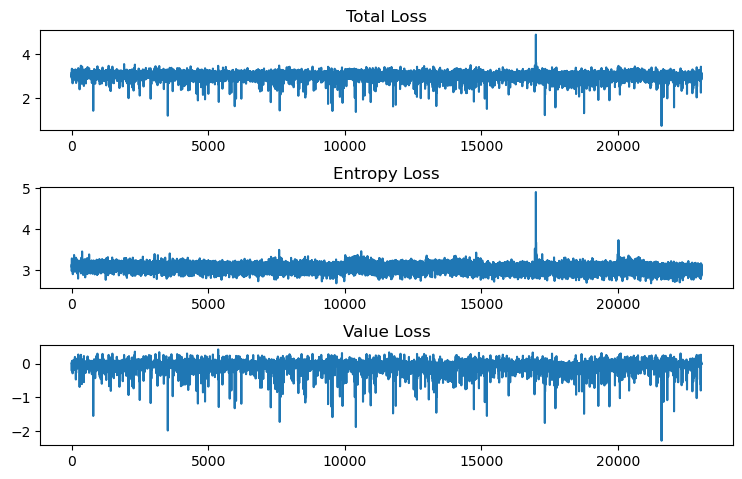

In [8]:
batch_loss = np.array(batch_loss)
print(batch_loss.shape)
f, ax = plt.subplots(3, 1, figsize = (8,5))
f.tight_layout(pad=2.0)
ax[0].plot(range(len(batch_loss)),batch_loss[:,0])
ax[0].set_title("Total Loss")

ax[1].plot(range(len(batch_loss)),batch_loss[:,1])
ax[1].set_title("Entropy Loss")

ax[2].plot(range(len(batch_loss)),batch_loss[:,2])
ax[2].set_title("Value Loss")

<a id = "T52"></a></a><div style="text-align: right"> <a href=#Table_of_content>Back?</a> </div>
## Evaluating by using the model to run a game
|No|Function|Description|
|:-:|:--|:--|
|1|actions_to_target(R, C, target_R, target_C, Map)|return sequence of action that will reach the target if the agent observe the target|
|2|run_map(Model_path, Map_path, MAX_STEP_ALLOW = 150000)|Given a model path and map_path, output the batch of actions and save into the text file|


In [12]:
# function that return sequence of action that will reach the target
def actions_to_target(R, C, target_R, target_C, Map):
    original_R, original_C = R, C
    valid_move = Map.va_move(R, C)  # Get the valid movement at currrent position
    all_act = [1, 3, 5, 7, 0, 2, 4, 6]
    actions_list = []
    i = 0
    # Find a path that can directly go throught the target
    while True:
        i+=1
        if i > 20:                    # If more than 20 iteration still cant find the path 
            np.random.shuffle(all_act)# Random shuffle the order or else it may stuck at a point that all valid move does not increase the city block distance with target
        
        for action in all_act:      
            if valid_move[action] == 1: # For each valid movement, random sample an action that can increase the city block distance
                move = Map.move_dic[action]
                if Map.distance(target_R, target_C, R + move[0], C + move[1]) < Map.distance(target_R, target_C, R, C): # If new location is nearer to target
                    actions_list.append(action)
                    R, C = R + move[0], C + move[1]
                    valid_move = Map.va_move(R, C)  # Get the valid movement at currrent position
                    break
                    
        else:   # If all valid move cannot go near to target, find again
            actions_list = []
            R, C = original_R, original_C
            
            
        if R == target_R and C == target_C:
            break
    print("num_iteration to find correct path =",i)
    return actions_list

In [13]:
os.makedirs("Record_Action", exist_ok=True)

# Given a model path and map_path, output the batch of actions and save into the text file
def run_map(Model_path, Map_path, MAX_STEP_ALLOW = 150000):
    
    try:   # If there exist '/'
        idx = Map_path.index('/') 
        map_name = Map_path[Map_path.index('/') + 1:]
    except:  # If not
        map_name = Map_path
        
    Map = Environment(Map_path,False)  
    batch_action = []

    # Device used
    device = torch.device("cpu")
    model = CNN().to(device)   # Move the CNN model to device
    model.eval()               # make sure we are in .eval() mode to deactivate Droupout layer
    model.load_state_dict(torch.load(Model_path))  # Load the model for predicting the outcome

    done = False
    found_target = False
    
    OH_RC_obs, va_move = get_first_obs(Map)
    print("The Target is At:\n",Map.target,"\n")
    with torch.no_grad():
        while not done and Map.time_step < MAX_STEP_ALLOW :

            # If not found target, use model to get an action for exploration of target
            if not found_target:
                action = get_action_n_prob(OH_RC_obs, va_move, Map, model, train_mode = False)  # action is an integer in range [0, 7]
                RC_obs, obs, reward, done = Map.step(action)   # return observation, reward and done/end game or not
                OH_RC_obs, va_move = get_next_obs(obs, RC_obs, Map)
                batch_action.append(action)

            # If find target, use pre-defined rule to go to the target
            else:
                target_R, target_C = np.transpose(np.where(obs == Map.T))[0]
                target_R, target_C = target_R - 12 + Map.curr_R, target_C - 12 + Map.curr_C 
                actions_list = actions_to_target(Map.curr_R, Map.curr_C, target_R, target_C, Map)
                
                print("We find target at",target_R, target_C, "! We are at", Map.curr_R, Map.curr_C)
                print("  Therefore, we will perform the following sequence of action",actions_list, "\n")
                for action in actions_list:
                    RC_obs, obs, reward, done = Map.step(action)
                    batch_action.append(action)
                    
                OH_RC_obs, va_move = get_next_obs(obs, RC_obs, Map)
                found_target = False


            if (obs == Map.T).sum() > 0:  # If we find target
                found_target = True
    
    num_RC_in_same_position = np.sort(np.unique(Map.recorded_RC))
    if done:
        print(f"> > > The Game end! with cost {Map.total_cost} ({Map.time_step} step)")
        print(f"For this map, the number that the agent pass through a same position = {num_RC_in_same_position}\n")
    else:
        print(f"> > > The Game does not end with cost {Map.total_cost} ({Map.time_step} step)")
        print(f"For this map, the number that the agent pass through a same position = {num_RC_in_same_position}\n")
        
    np.savetxt(f"Record_Action/{Model_path[:-3]}_{map_name[:-4]}.txt",np.array(batch_action, dtype = np.int16),fmt='%d',delimiter=',', newline=',')
    return Map.total_cost, Map.time_step
    

In [13]:
Model_path =  ["CNN40000.pt", "CNN50000.pt", "CNN60000.pt"]
Map_path = [f"Maps/map{i}_trans.txt" for i in range(40,60)]

batch_cost_n_step = []
for map_p in Map_path:
    for model_p in Model_path:
        print(f"> > > > > For model '{model_p}' at map '{map_p}' < < < < <")
        cost, step = run_map(model_p, map_p)
        batch_cost_n_step.append([cost, step])

> > > > > For model 'CNN40000.pt' at map 'Maps/map40_trans.txt' < < < < <
The Target is At:
 [[307 296]] 

num_iteration to find correct path = 14
We find target at 307 296 ! We are at 297 292
  Therefore, we will perform the following sequence of action [0, 0, 0, 0, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6] 

> > > The Game end! with cost 292270 (24127 step)
For this map, the number that the agent pass through a same position = [   0    1    2    3    4 1000]

> > > > > For model 'CNN50000.pt' at map 'Maps/map40_trans.txt' < < < < <
The Target is At:
 [[307 296]] 

num_iteration to find correct path = 10
We find target at 307 296 ! We are at 309 306
  Therefore, we will perform the following sequence of action [3, 3, 4, 4, 4, 4, 4, 4, 4, 4] 

> > > The Game end! with cost 1998 (155 step)
For this map, the number that the agent pass through a same position = [   0    1 1000]

> > > > > For model 'CNN60000.pt' at map 'Maps/map40_trans.txt' < < < < <
The Target is At:
 [[307 296]] 

num_iteration to

num_iteration to find correct path = 16
We find target at 68 172 ! We are at 60 182
  Therefore, we will perform the following sequence of action [6, 6, 6, 5, 4, 6, 6, 4, 6, 5, 4, 4, 4, 4, 4, 4] 

> > > The Game end! with cost 74532 (6196 step)
For this map, the number that the agent pass through a same position = [   0    1    2    3 1000]

> > > > > For model 'CNN60000.pt' at map 'Maps/map46_trans.txt' < < < < <
The Target is At:
 [[ 68 172]] 

num_iteration to find correct path = 13
We find target at 68 172 ! We are at 78 180
  Therefore, we will perform the following sequence of action [2, 3, 3, 2, 3, 2, 3, 3, 4, 2, 2, 4, 4] 

> > > The Game end! with cost 31424 (2306 step)
For this map, the number that the agent pass through a same position = [   0    1    2 1000]

> > > > > For model 'CNN40000.pt' at map 'Maps/map47_trans.txt' < < < < <
The Target is At:
 [[319 368]] 

num_iteration to find correct path = 15
We find target at 319 368 ! We are at 309 376
  Therefore, we will perfo

num_iteration to find correct path = 11
We find target at 338 260 ! We are at 348 261
  Therefore, we will perform the following sequence of action [2, 4, 2, 2, 2, 2, 2, 2, 2, 2, 2] 

> > > The Game end! with cost 1452638 (114959 step)
For this map, the number that the agent pass through a same position = [   0    1    2    3    4    5    6    7    8    9 1000]

> > > > > For model 'CNN40000.pt' at map 'Maps/map53_trans.txt' < < < < <
The Target is At:
 [[304  40]] 

num_iteration to find correct path = 17
We find target at 304 40 ! We are at 294 30
  Therefore, we will perform the following sequence of action [7, 6, 0, 0, 0, 7, 0, 0, 7, 6, 6, 6, 0, 6, 6, 6, 0] 

> > > The Game end! with cost 849294 (66711 step)
For this map, the number that the agent pass through a same position = [   0    1    2    3    4    5 1000]

> > > > > For model 'CNN50000.pt' at map 'Maps/map53_trans.txt' < < < < <
The Target is At:
 [[304  40]] 

num_iteration to find correct path = 15
We find target at 304 

num_iteration to find correct path = 13
We find target at 17 220 ! We are at 12 230
  Therefore, we will perform the following sequence of action [4, 6, 4, 6, 4, 5, 6, 5, 4, 4, 4, 4, 4] 

> > > The Game end! with cost 3572 (308 step)
For this map, the number that the agent pass through a same position = [   0    1 1000]

> > > > > For model 'CNN50000.pt' at map 'Maps/map59_trans.txt' < < < < <
The Target is At:
 [[ 17 220]] 

num_iteration to find correct path = 15
We find target at 17 220 ! We are at 27 211
  Therefore, we will perform the following sequence of action [1, 2, 1, 0, 1, 2, 2, 0, 0, 0, 0, 1, 2, 2, 2] 

> > > The Game end! with cost 7702 (587 step)
For this map, the number that the agent pass through a same position = [   0    1 1000]

> > > > > For model 'CNN60000.pt' at map 'Maps/map59_trans.txt' < < < < <
The Target is At:
 [[ 17 220]] 

num_iteration to find correct path = 12
We find target at 17 220 ! We are at 12 230
  Therefore, we will perform the following sequenc

## Analyse the model

In [10]:
%%time
# Model_path =  ["CNN50000.pt", "CNN60000.pt","CNN70000.pt","CNN80000.pt", "CNN90000.pt", "CNN100000.pt", "CNN110000.pt", "CNN120000.pt","CNN130000.pt", "CNN130000.pt", "CNN140000.pt", "CNN150000.pt"]
# Model_path = ["CNN170000.pt", "CNN190000.pt", "CNN200000.pt",  "CNN210000.pt", "CNN230000.pt", "CNN250000.pt", "CNN260000.pt", "CNN270000.pt", "CNN280000.pt", "CNN290000.pt", "CNN300000.pt", "CNN310000.pt"]
Model_path = ["CNN70000.pt", "CNN80000.pt", "CNN90000.pt", "CNN100000.pt", "CNN110000.pt","CNN130000.pt","CNN170000.pt","CNN210000.pt", "CNN310000.pt"]
Map_path = [f"Maps/map{i}_trans.txt" for i in range(40,45)]

batch_cost_n_step = []
for map_p in Map_path:
    for model_p in Model_path:
        try:   # If there exist '/'
            idx = map_p.index('/') 
            map_name = map_p[idx + 1:]
        except:  # If not
            map_name = map_p
        
        txt_path = f"Record_Action/{model_p[:-3]}_{map_name[:-4]}.txt"
        loaded_batch_action = np.genfromtxt(txt_path,delimiter=',',filling_values=0)[:-1]
        num_action = loaded_batch_action.shape[0]
        num_10_cost_action = (loaded_batch_action %2 == 0).sum()  # For Left(0), Up(2), Right(4), Down(6)
        num_14_cost_action = num_action - num_10_cost_action      # Otherwise

        cost, step = num_10_cost_action*10 + num_14_cost_action * 14 , num_action
        batch_cost_n_step.append([cost, step])

CPU times: total: 6.05 s
Wall time: 6.05 s


In [11]:
# Print out the summary of the model
df = pd.DataFrame(batch_cost_n_step,columns =["Total cost", "Time step"], 
                  index = [f'{model_p}_{map_p[:-4]}' for map_p in Map_path for model_p in Model_path ])
pd.options.display.max_rows = len(Model_path) * len(Map_path)
df.head(len(Model_path) * len(Map_path))

Total cost  Time step
CNN70000.pt_Maps/map40_trans        82400       6640
CNN80000.pt_Maps/map40_trans       259282      20831
CNN90000.pt_Maps/map40_trans       191806      15117
CNN100000.pt_Maps/map40_trans        9276        702
CNN110000.pt_Maps/map40_trans      258402      20135
CNN130000.pt_Maps/map40_trans      215736      16956
CNN170000.pt_Maps/map40_trans      150614      11481
CNN210000.pt_Maps/map40_trans      283494      22001
CNN310000.pt_Maps/map40_trans       31320       2372
CNN70000.pt_Maps/map41_trans        88028       7326
CNN80000.pt_Maps/map41_trans        25516       2098
CNN90000.pt_Maps/map41_trans        91692       7566
CNN100000.pt_Maps/map41_trans      295654      23553
CNN110000.pt_Maps/map41_trans       61140       4962
CNN130000.pt_Maps/map41_trans       36186       2991
CNN170000.pt_Maps/map41_trans       69750       5485
CNN210000.pt_Maps/map41_trans       61862       5253
CNN310000.pt_Maps/map41_trans       96874       7823
CNN70000.pt_Maps/map42_trans        22804       1736
CNN80000.pt_Maps/map42_trans        17048       1290
CNN90000.pt_Maps/map42_trans        74622       5795
CNN100000.pt_Maps/map42_trans       67956       5272
CNN110000.pt_Maps/map42_trans       66304       5258
CNN130000.pt_Maps/map42_trans       63198       4927
CNN170000.pt_Maps/map42_trans       97226       7457
CNN210000.pt_Maps/map42_trans       64190       4943
CNN310000.pt_Maps/map42_trans       90330       6725
CNN70000.pt_Maps/map43_trans       145126      11707
CNN80000.pt_Maps/map43_trans       188604      15560
CNN90000.pt_Maps/map43_trans       178546      14309
CNN100000.pt_Maps/map43_trans      202412      16316
CNN110000.pt_Maps/map43_trans      184704      14810
CNN130000.pt_Maps/map43_trans      128194      10501
CNN170000.pt_Maps/map43_trans      192502      15407
CNN210000.pt_Maps/map43_trans      328394      26097
CNN310000.pt_Maps/map43_trans      138588      10768
CNN70000.pt_Maps/map44_trans       257054      20937
CNN80000.pt_Maps/map44_trans       132530      10631
CNN90000.pt_Maps/map44_trans       135608      10520
CNN100000.pt_Maps/map44_trans       71294       5725
CNN110000.pt_Maps/map44_trans       44024       3288
CNN130000.pt_Maps/map44_trans      116390       9245
CNN170000.pt_Maps/map44_trans      165112      13028
CNN210000.pt_Maps/map44_trans       84790       6441
CNN310000.pt_Maps/map44_trans      101924       7694

<IPython.core.display.Javascript object>


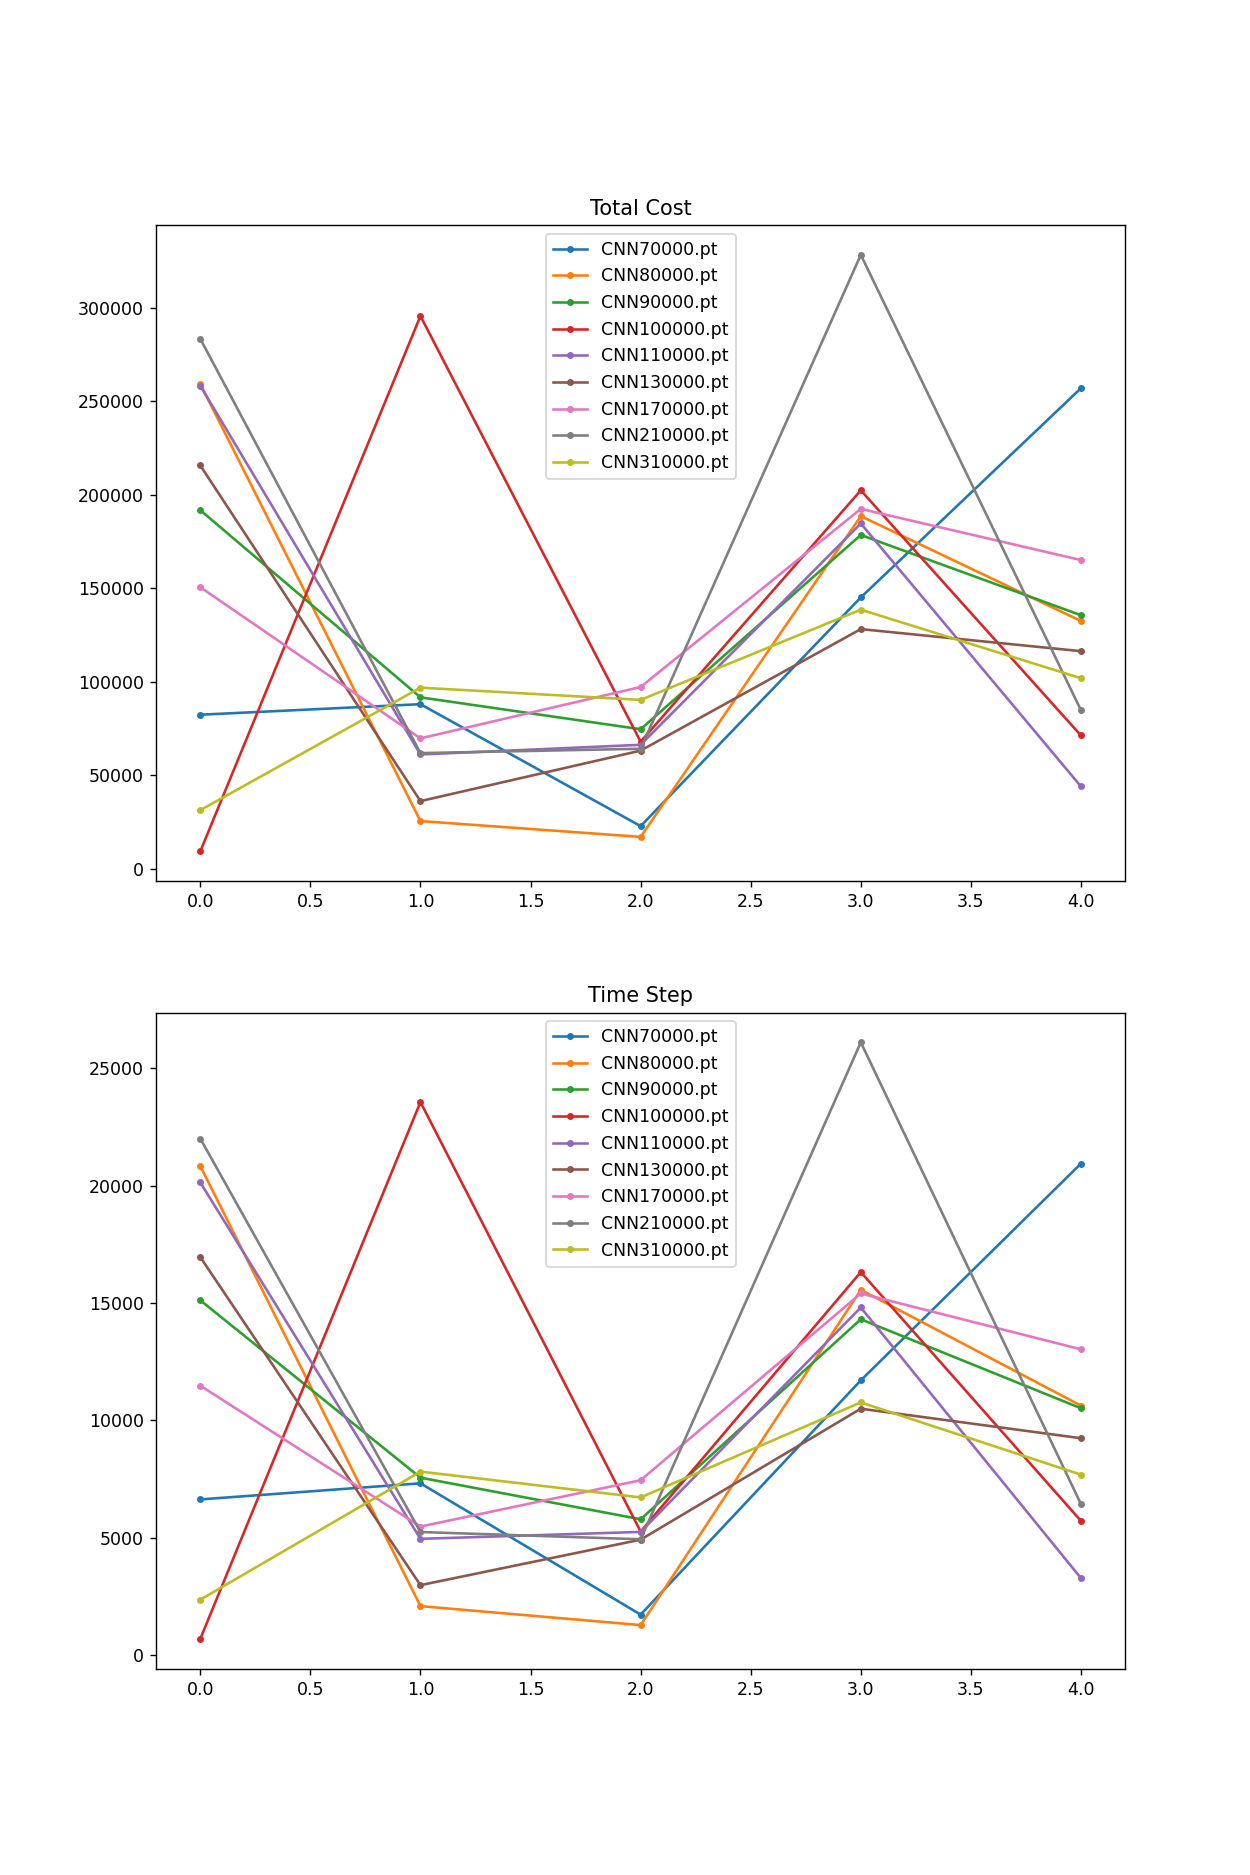

In [12]:
%matplotlib notebook
batch_cost_n_step = np.array(batch_cost_n_step)

fig, ax = plt.subplots(2,1, figsize = (10,15))
ax[0].set_title("Total Cost")
ax[1].set_title("Time Step")
for i in range(len(Model_path)):
    
    ax[0].plot(range(len(Map_path)), batch_cost_n_step[[j for j in range(i,len(Model_path) * len(Map_path), len(Model_path))]][:,0], 
             marker='.', label = Model_path[i])
    ax[1].plot(range(len(Map_path)), batch_cost_n_step[[j for j in range(i,len(Model_path) * len(Map_path), len(Model_path))]][:,1], 
             marker='.', label = Model_path[i])
    
    plt.show()
ax[0].legend()
ax[1].legend()


## Plot out the actions of the model in map

<IPython.core.display.Javascript object>


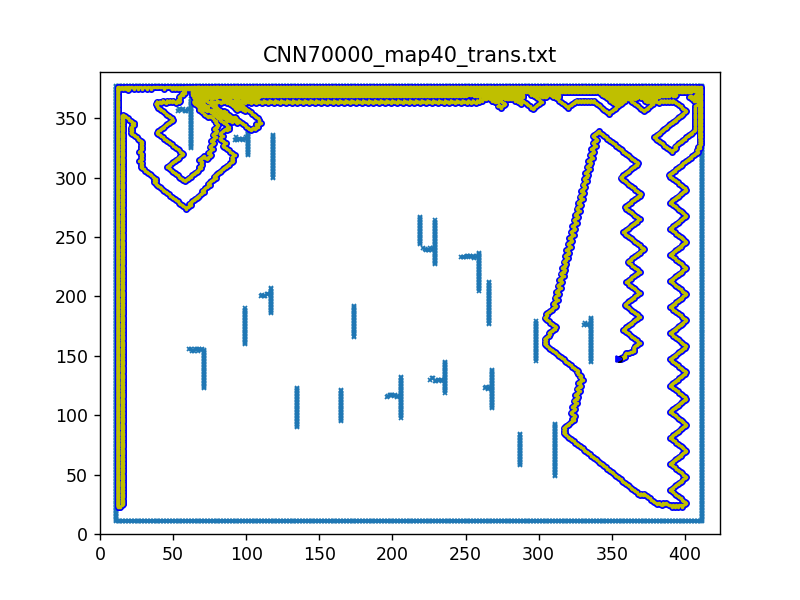

<IPython.core.display.Javascript object>


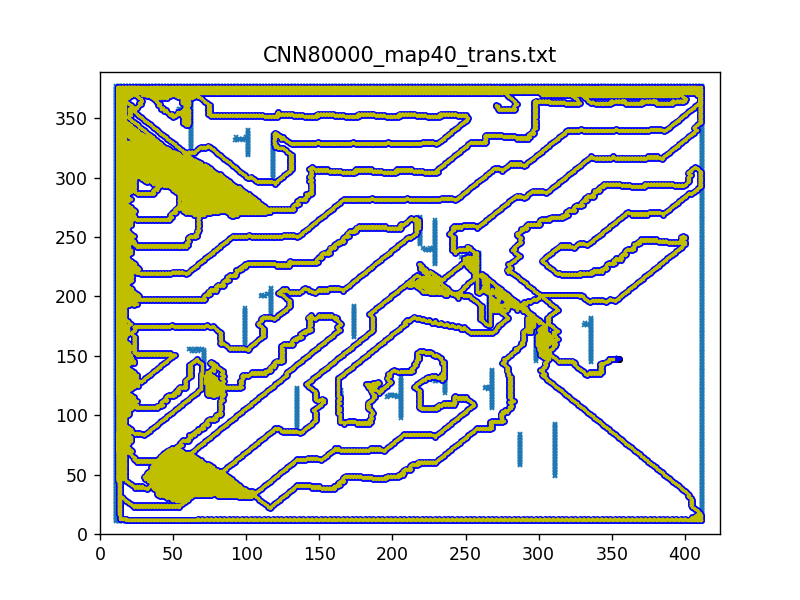

<IPython.core.display.Javascript object>


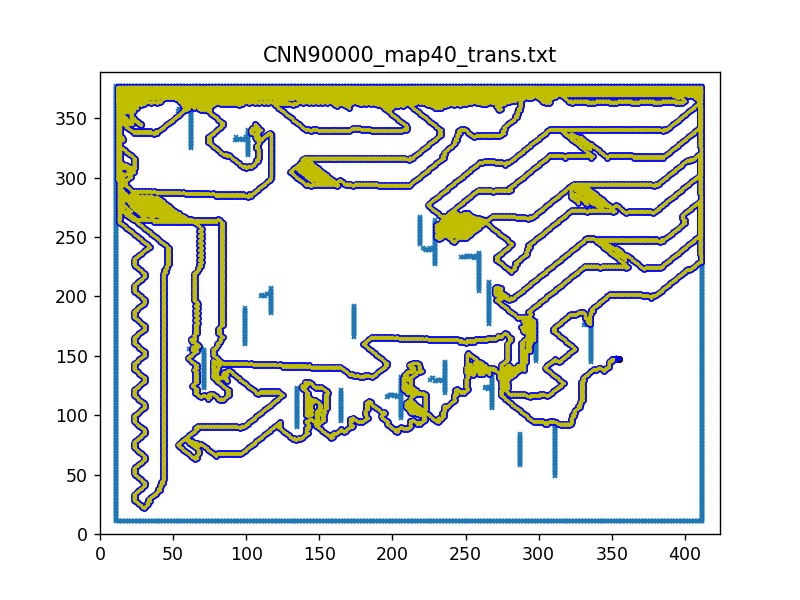

<IPython.core.display.Javascript object>


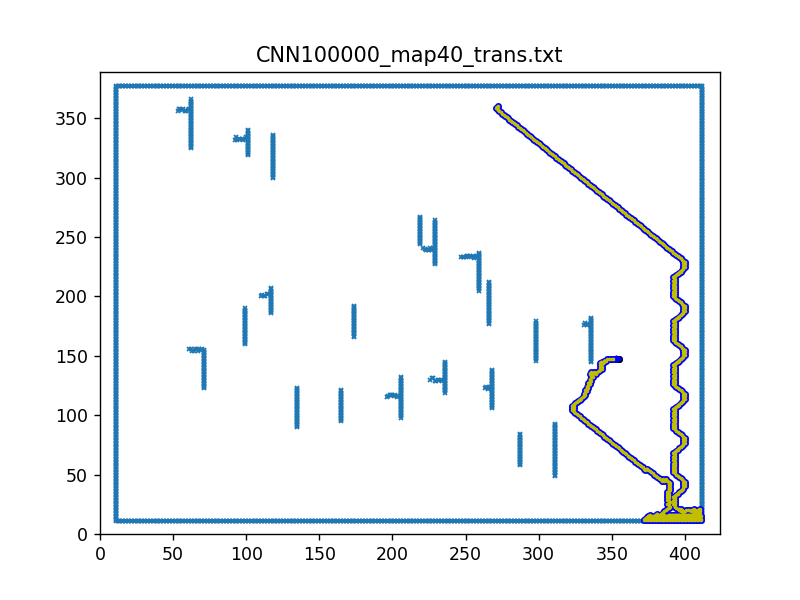

<IPython.core.display.Javascript object>


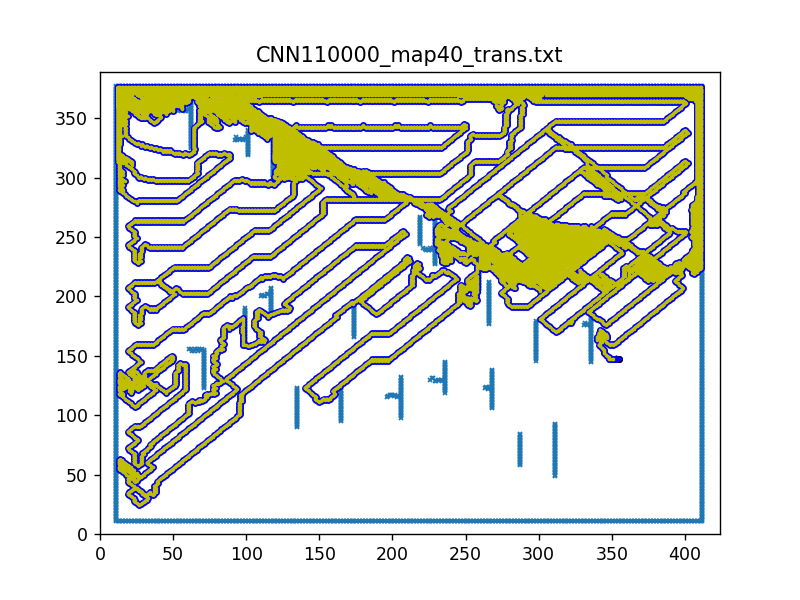

<IPython.core.display.Javascript object>


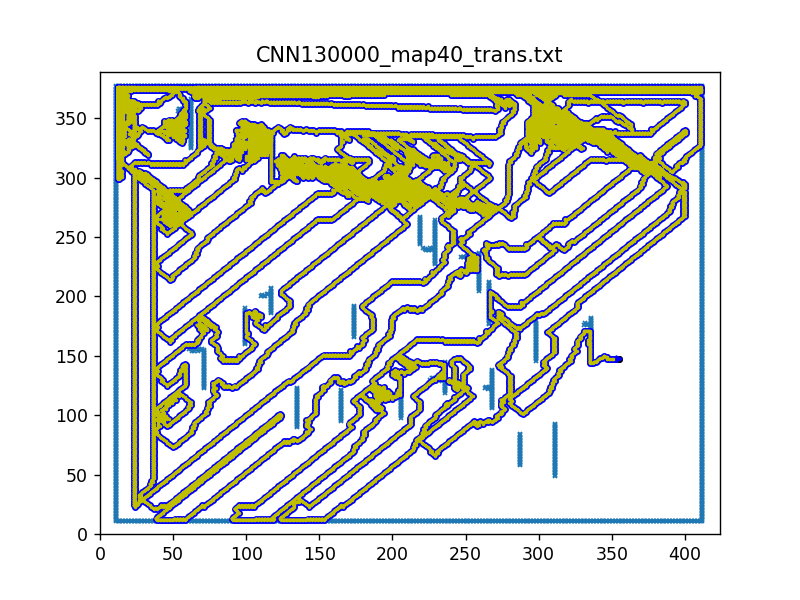

<IPython.core.display.Javascript object>


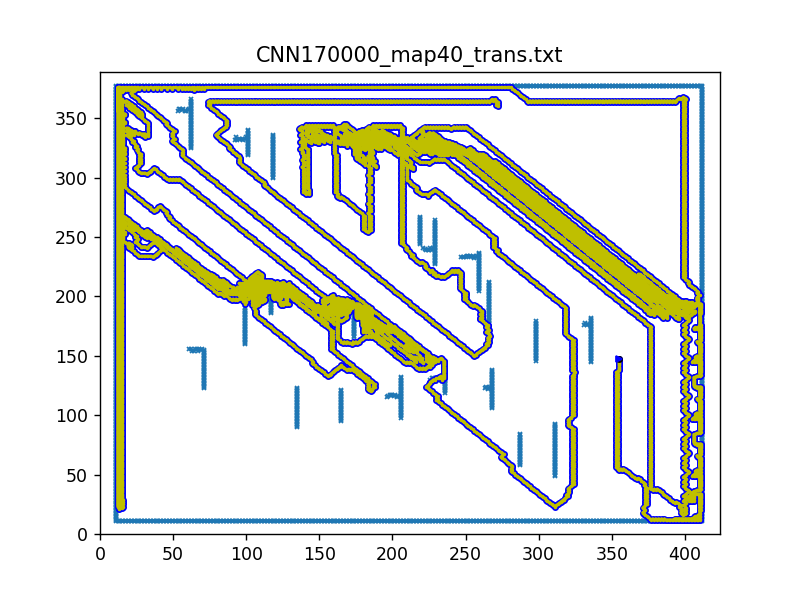

<IPython.core.display.Javascript object>


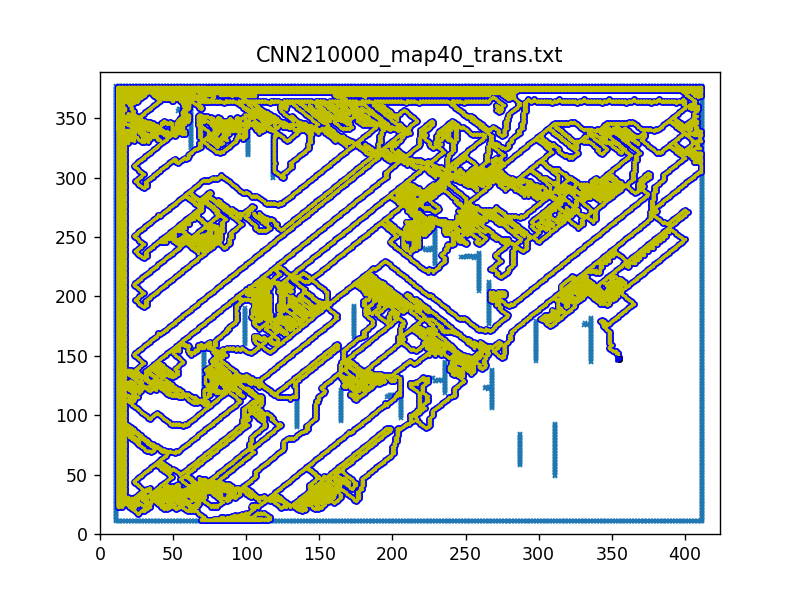

<IPython.core.display.Javascript object>


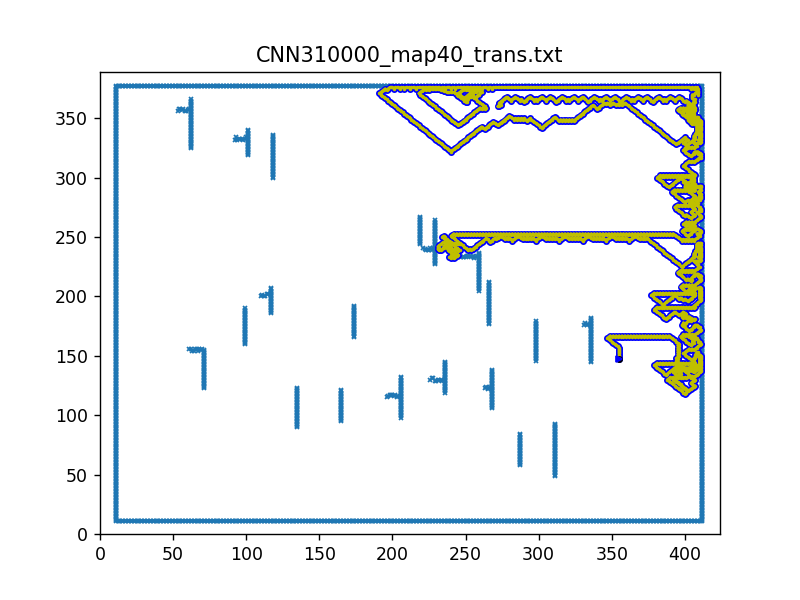

<IPython.core.display.Javascript object>


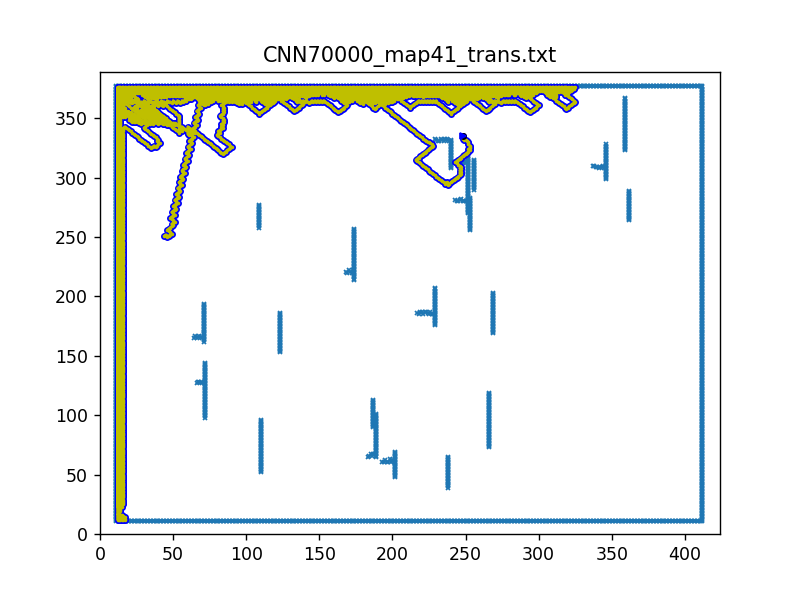

<IPython.core.display.Javascript object>


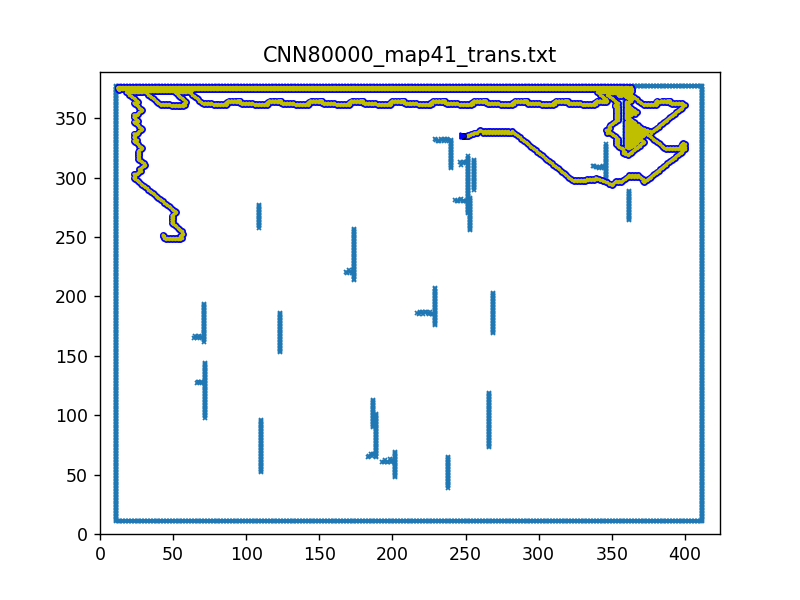

<IPython.core.display.Javascript object>


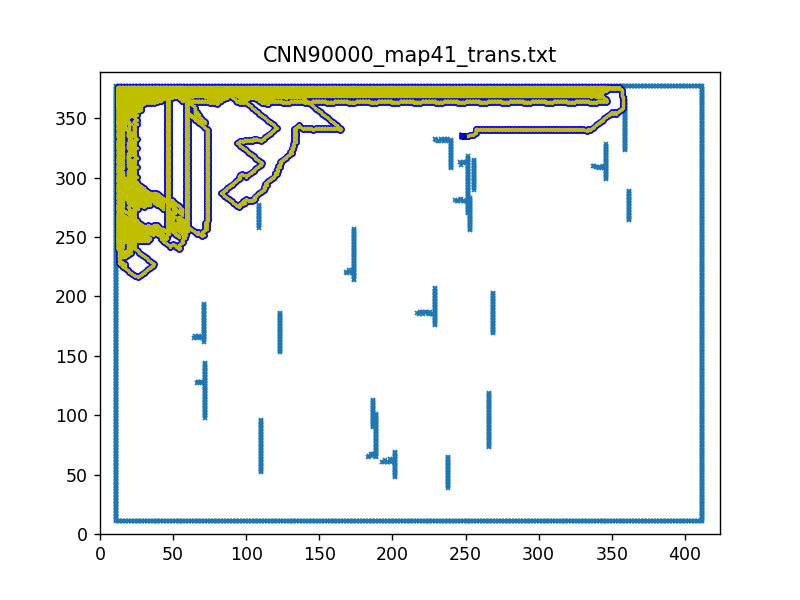

<IPython.core.display.Javascript object>


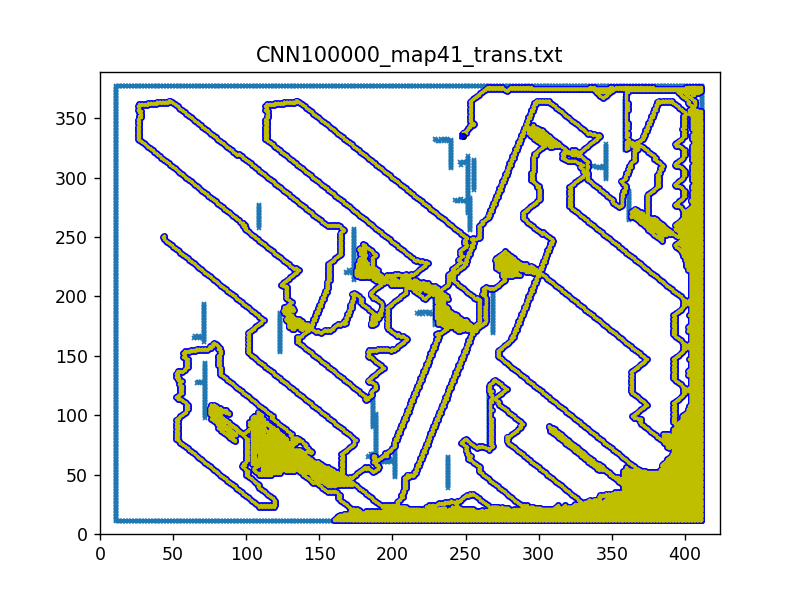

<IPython.core.display.Javascript object>


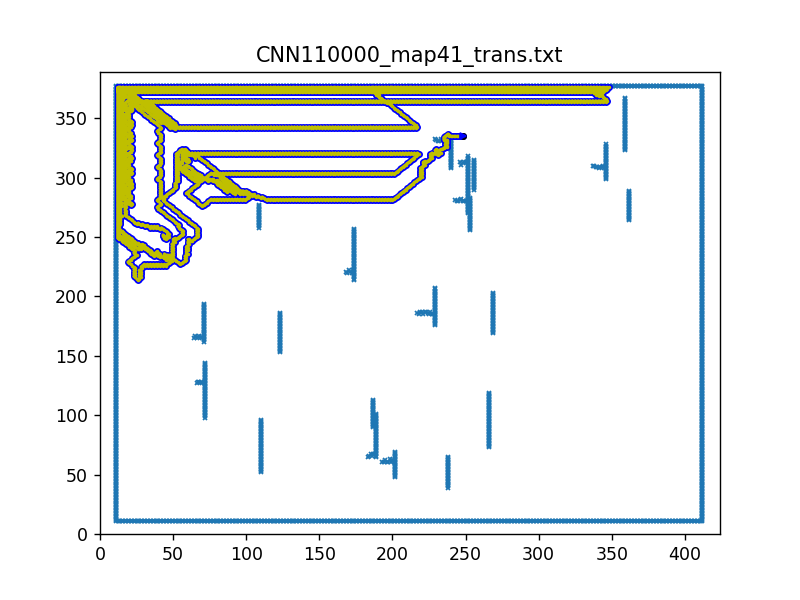

<IPython.core.display.Javascript object>


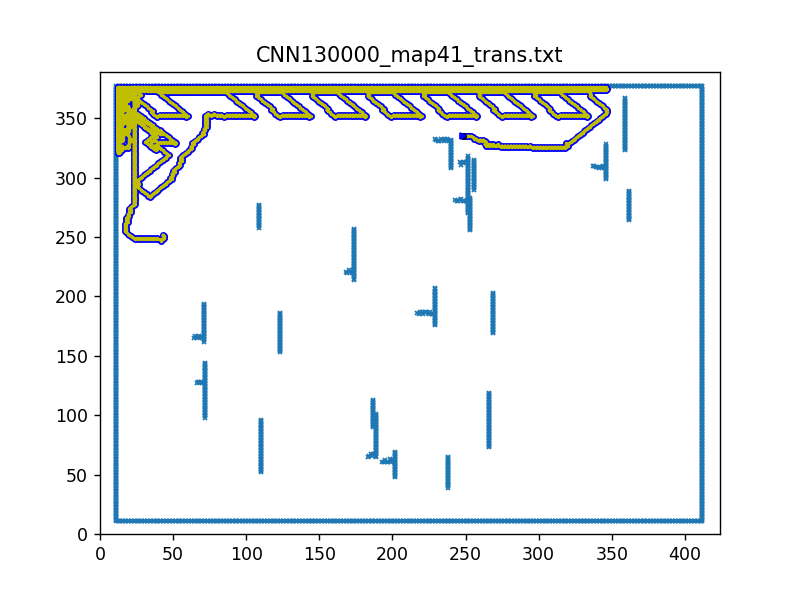

<IPython.core.display.Javascript object>


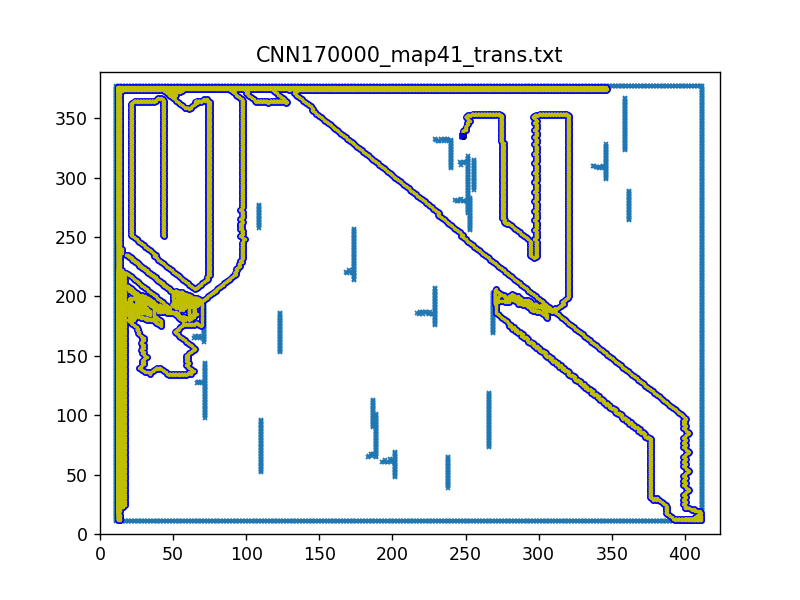

<IPython.core.display.Javascript object>


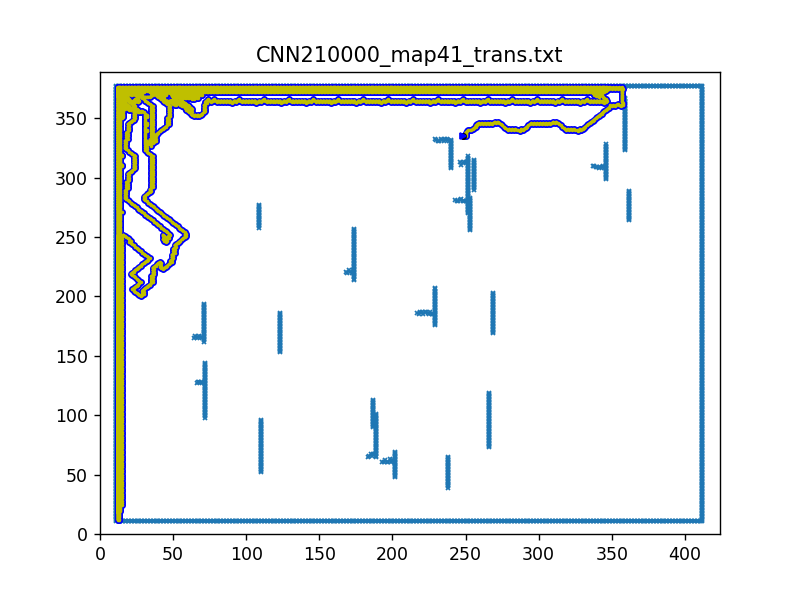

<IPython.core.display.Javascript object>


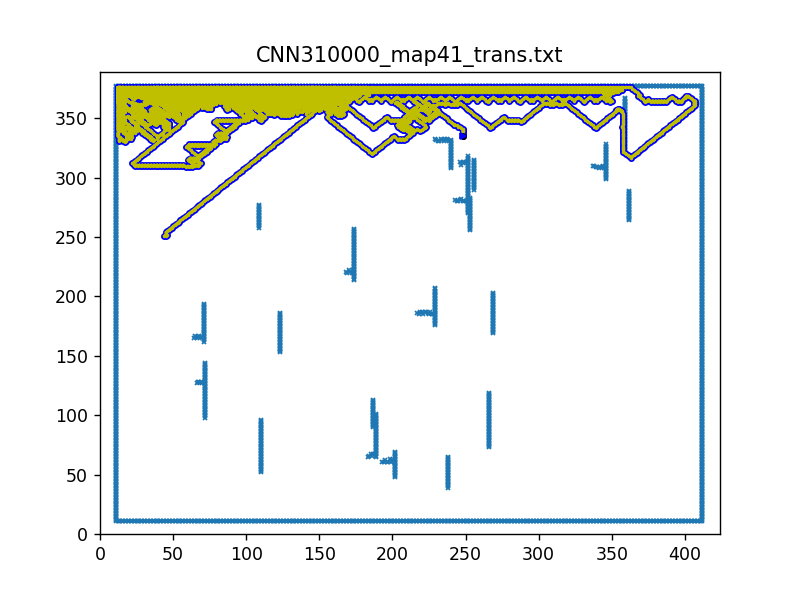

<IPython.core.display.Javascript object>


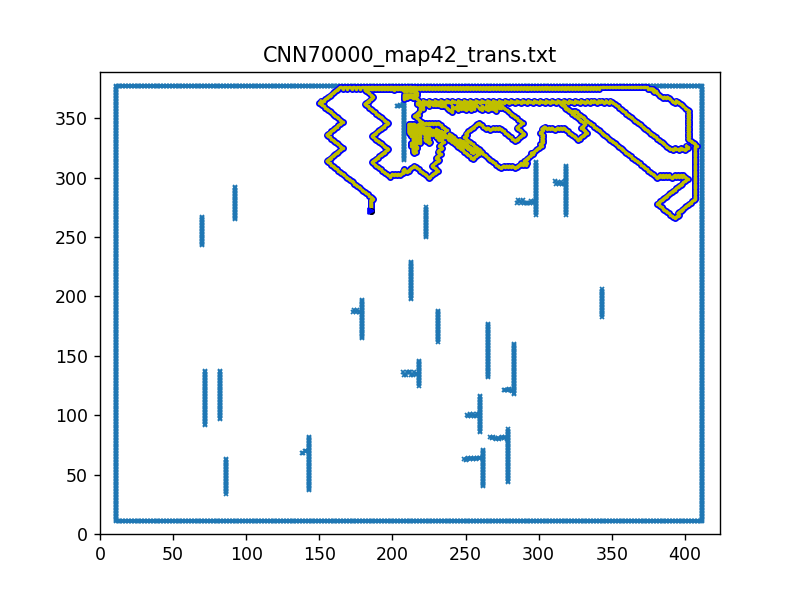

<IPython.core.display.Javascript object>


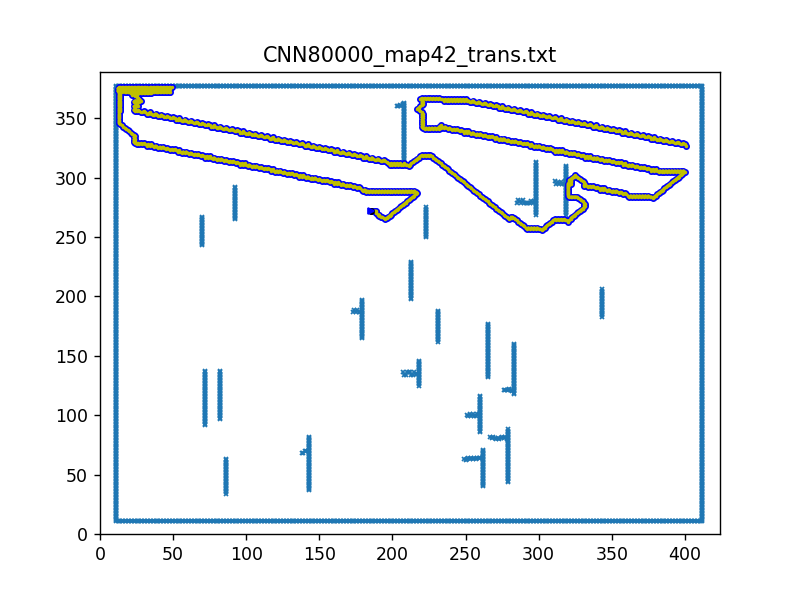

C:\Users\xinju\AppData\Local\Temp\ipykernel_2624\2847428156.py:357: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()


<IPython.core.display.Javascript object>


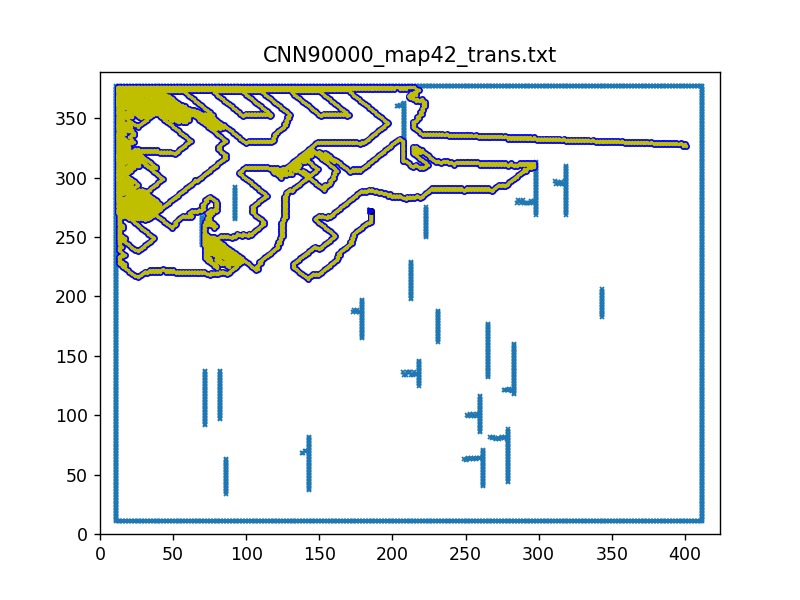

<IPython.core.display.Javascript object>


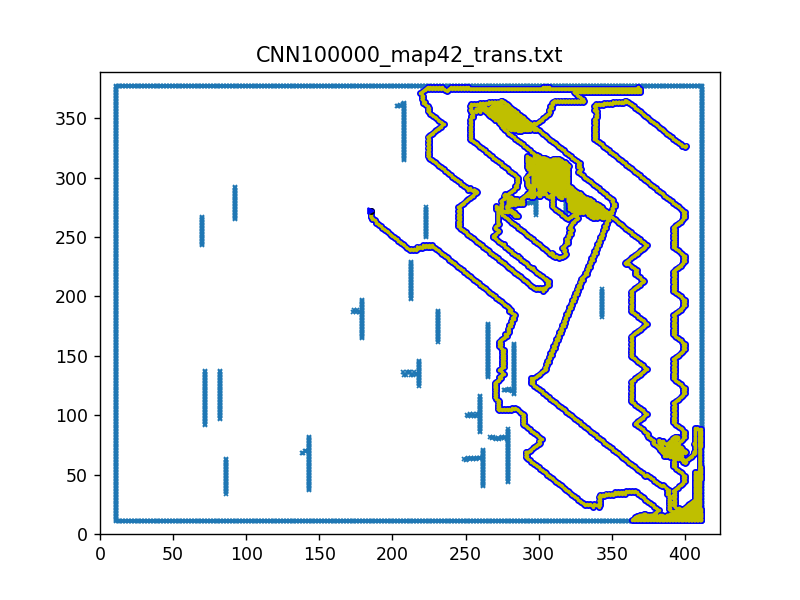

<IPython.core.display.Javascript object>


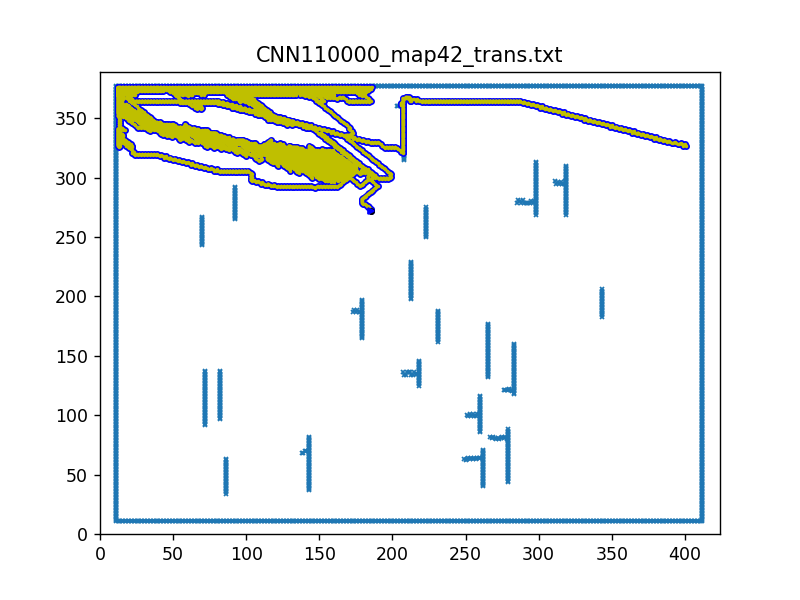

<IPython.core.display.Javascript object>


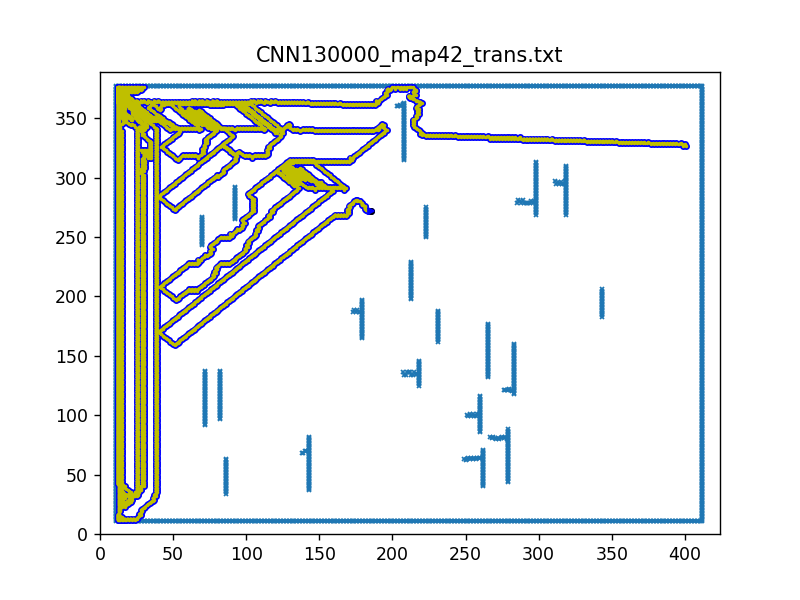

<IPython.core.display.Javascript object>


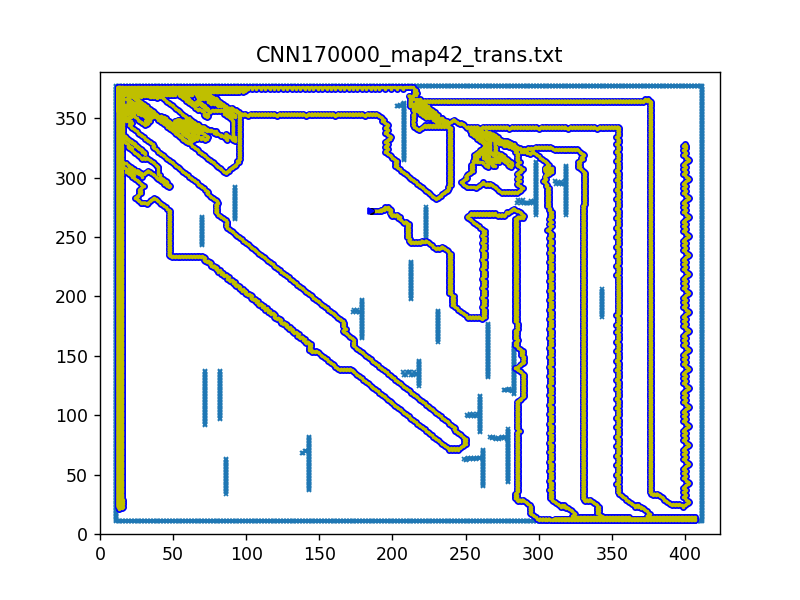

<IPython.core.display.Javascript object>


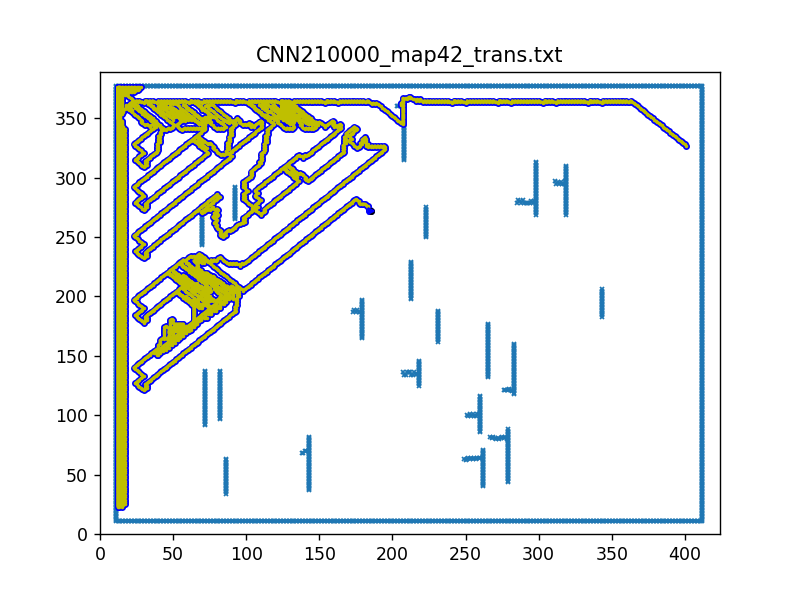

<IPython.core.display.Javascript object>


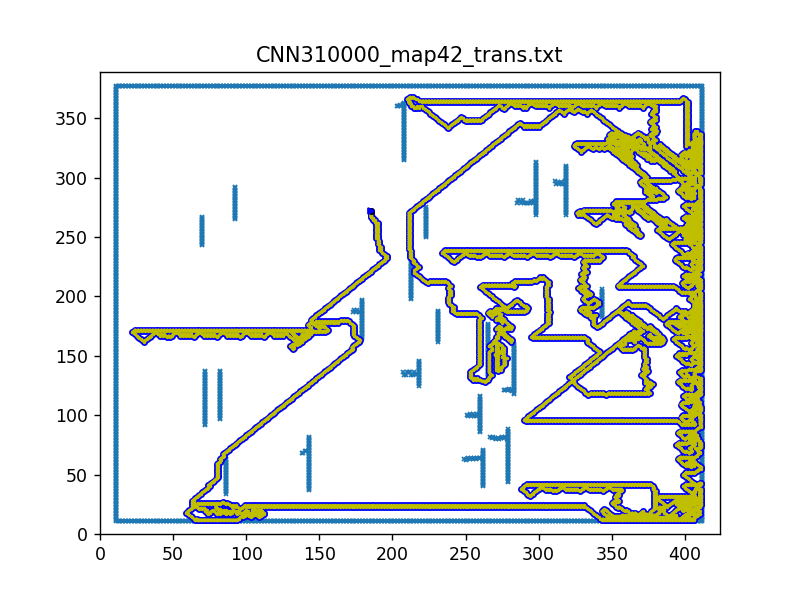

<IPython.core.display.Javascript object>


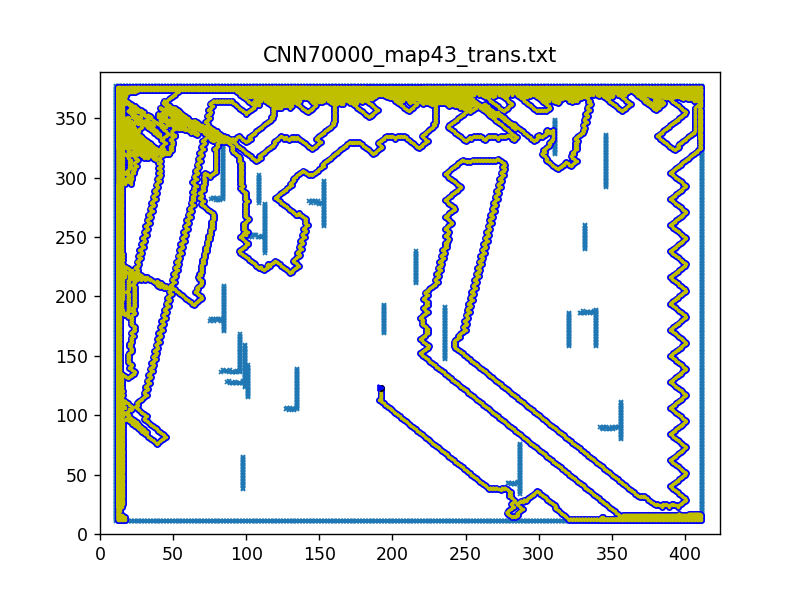

<IPython.core.display.Javascript object>


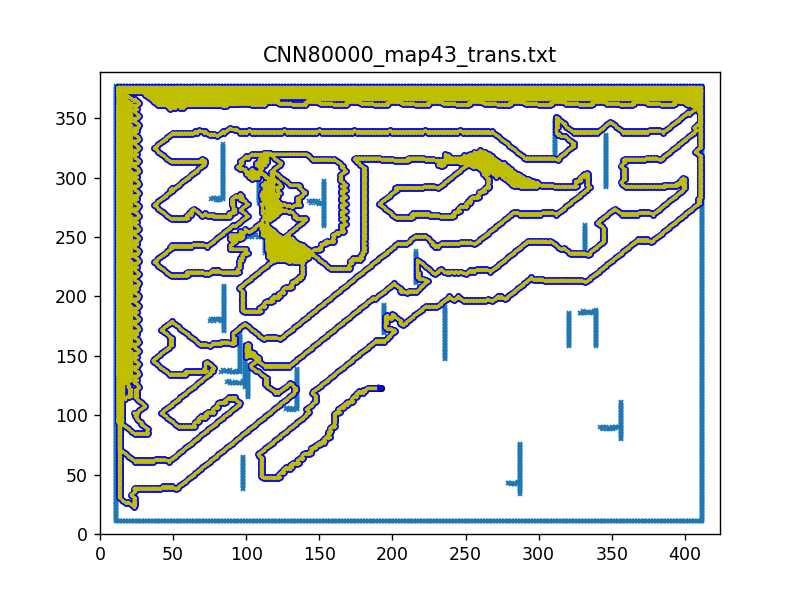

<IPython.core.display.Javascript object>


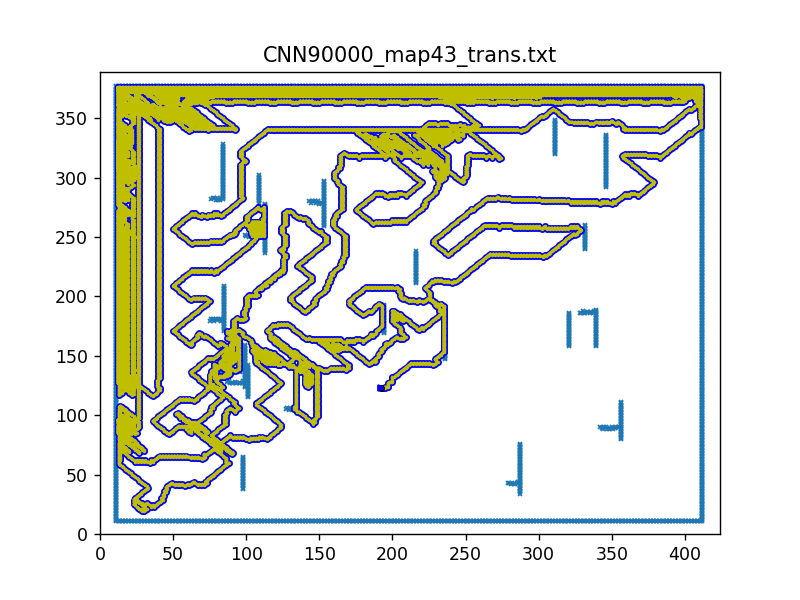

<IPython.core.display.Javascript object>


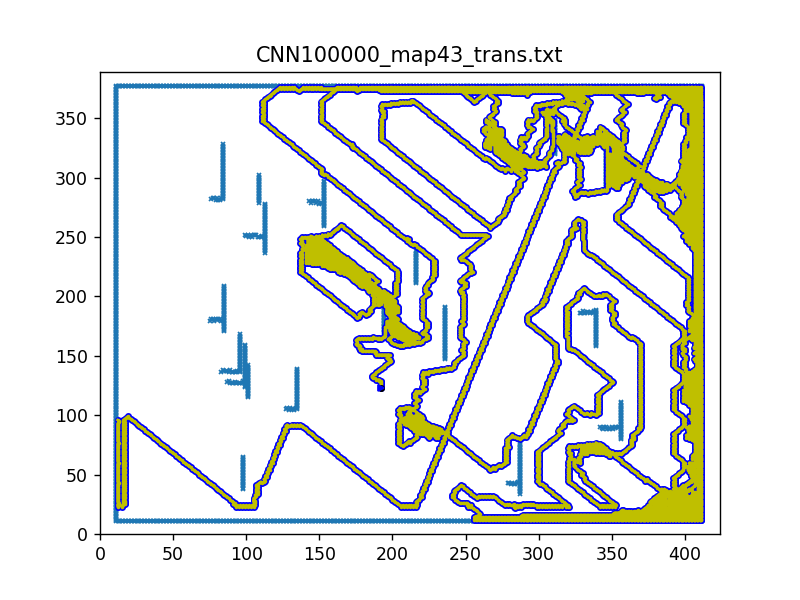

<IPython.core.display.Javascript object>


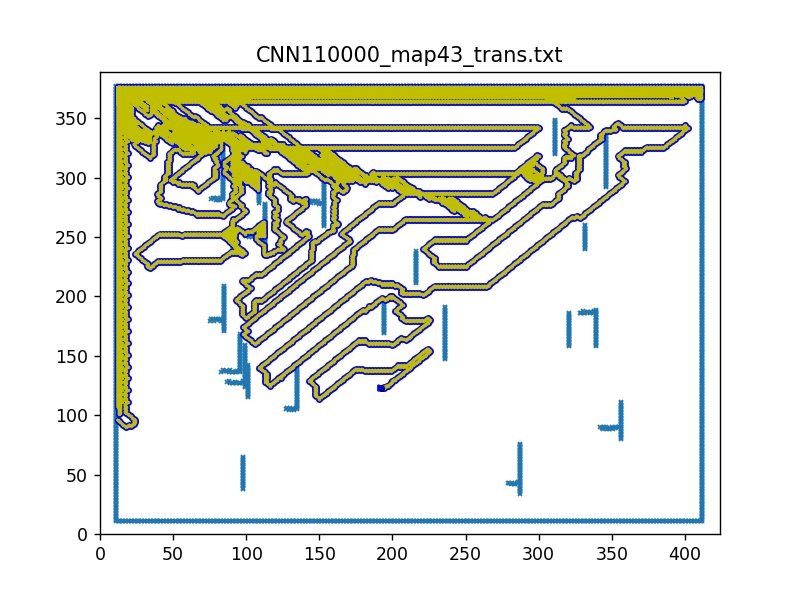

<IPython.core.display.Javascript object>


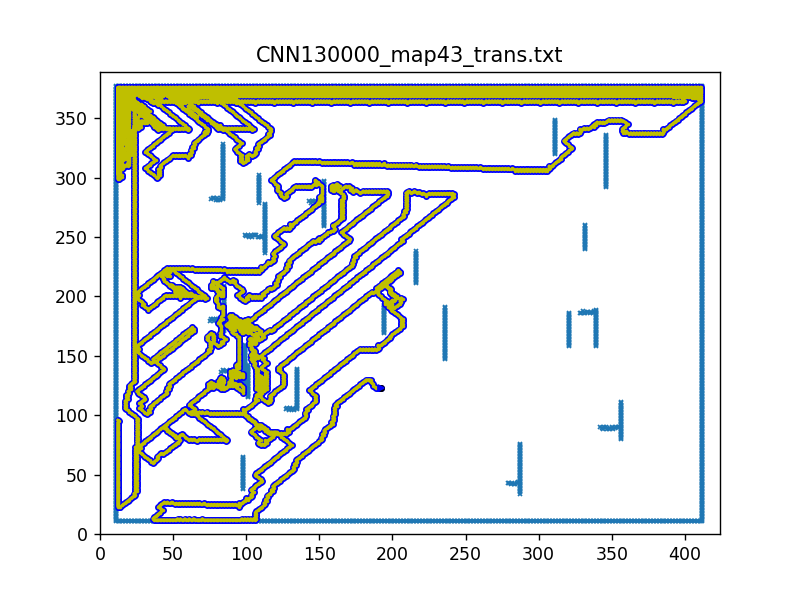

<IPython.core.display.Javascript object>


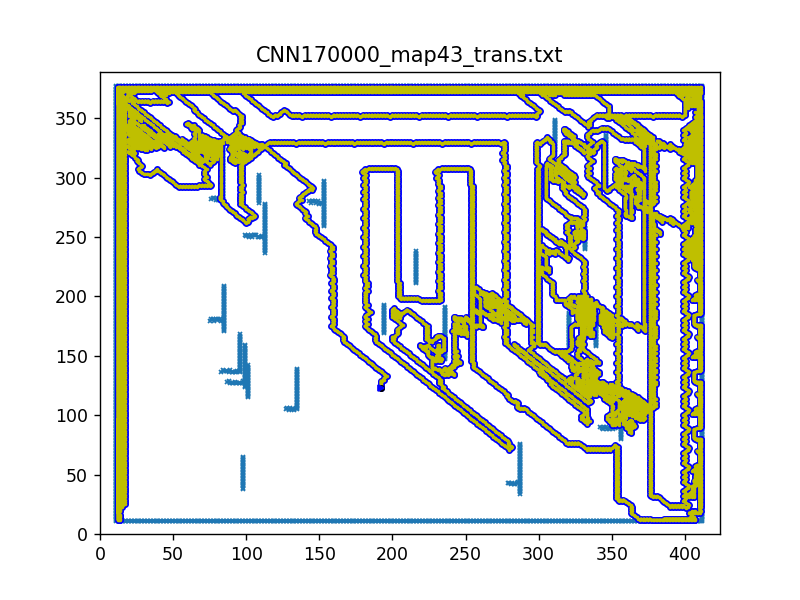

<IPython.core.display.Javascript object>


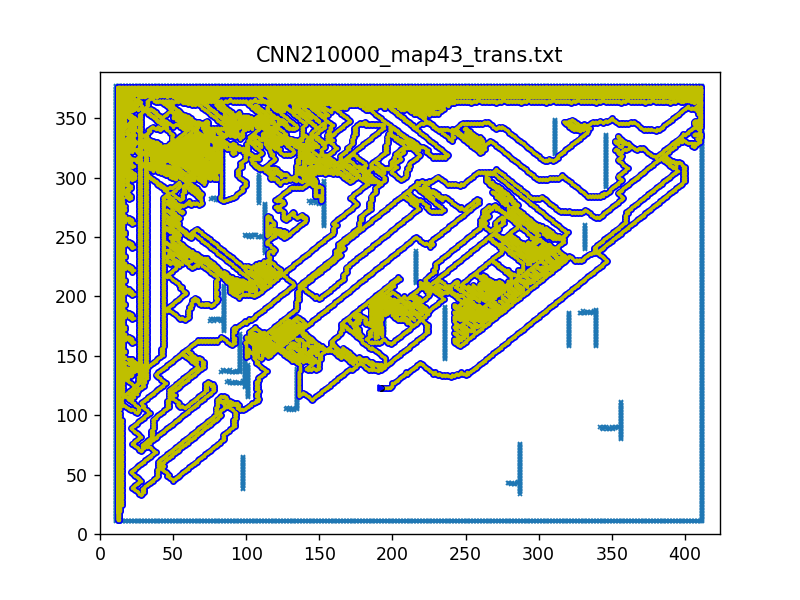

<IPython.core.display.Javascript object>


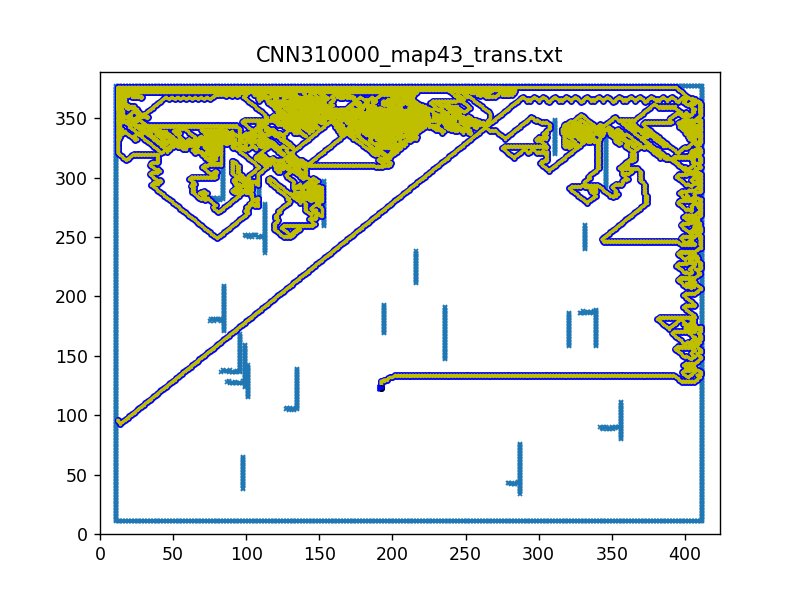

<IPython.core.display.Javascript object>


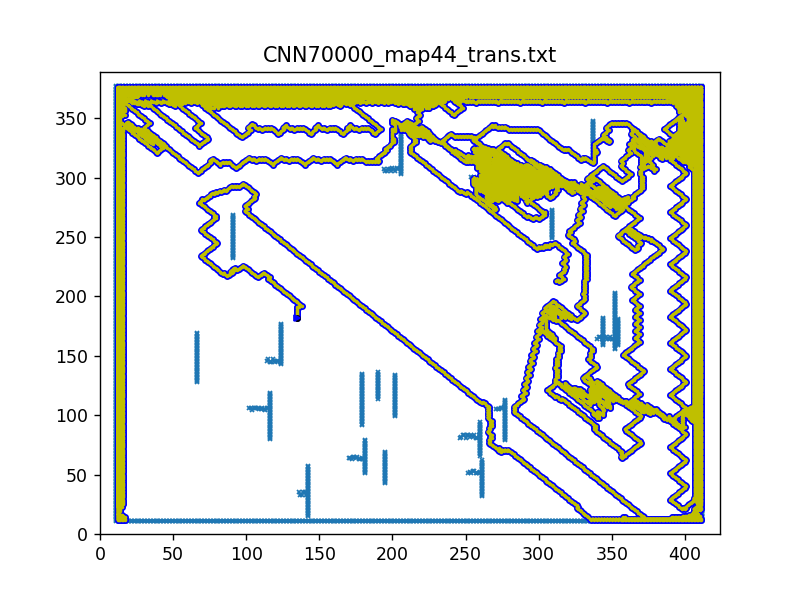

<IPython.core.display.Javascript object>


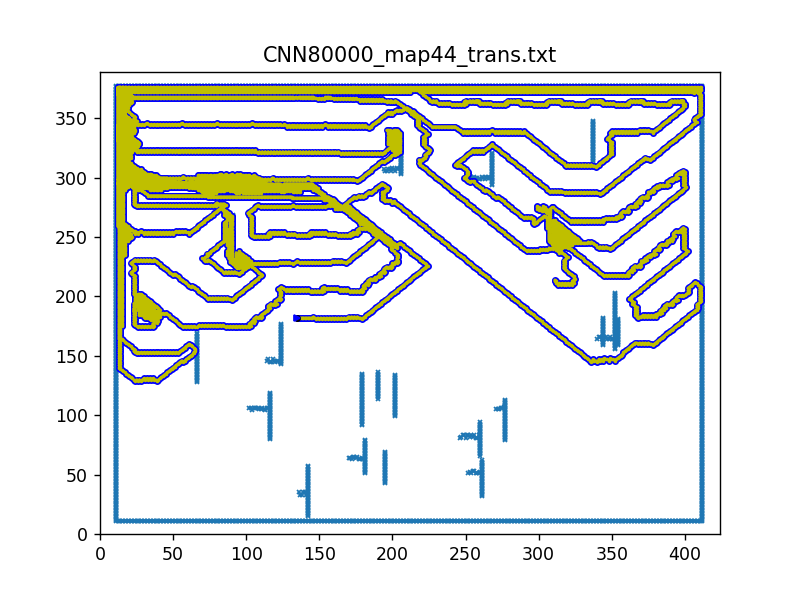

<IPython.core.display.Javascript object>


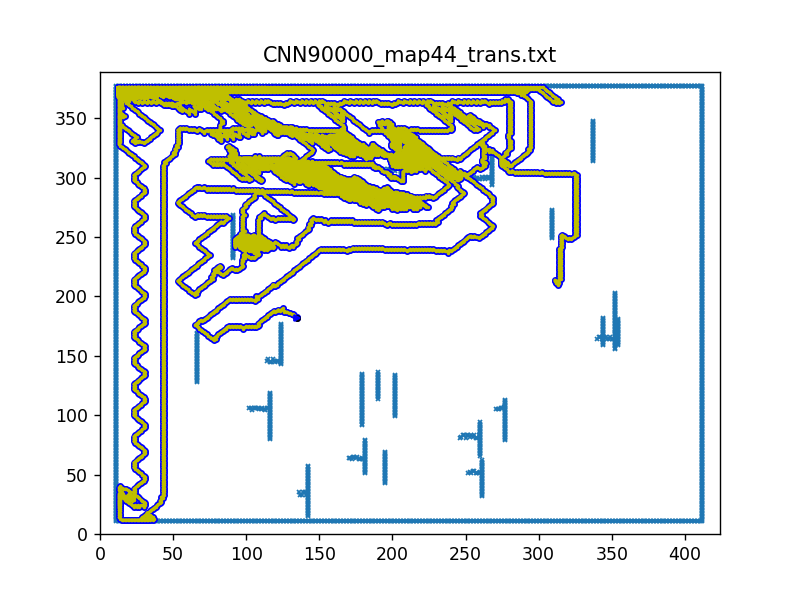

<IPython.core.display.Javascript object>


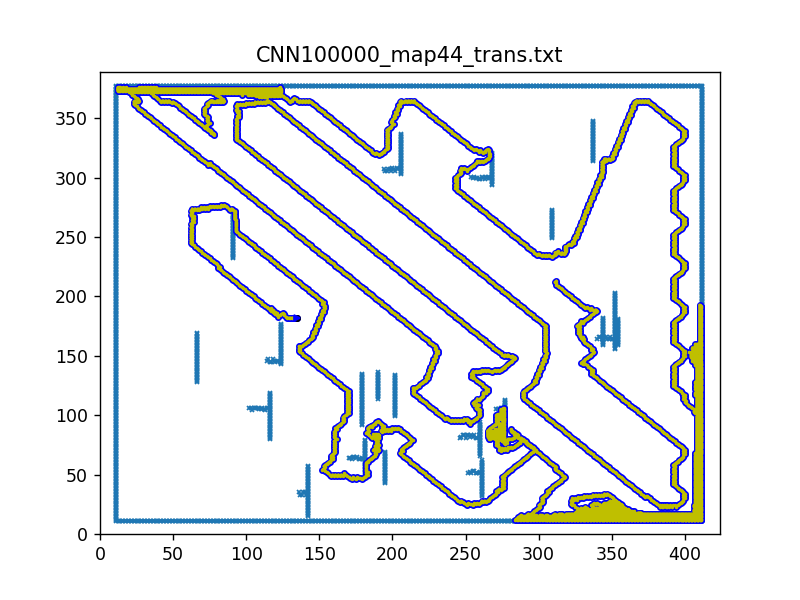

<IPython.core.display.Javascript object>


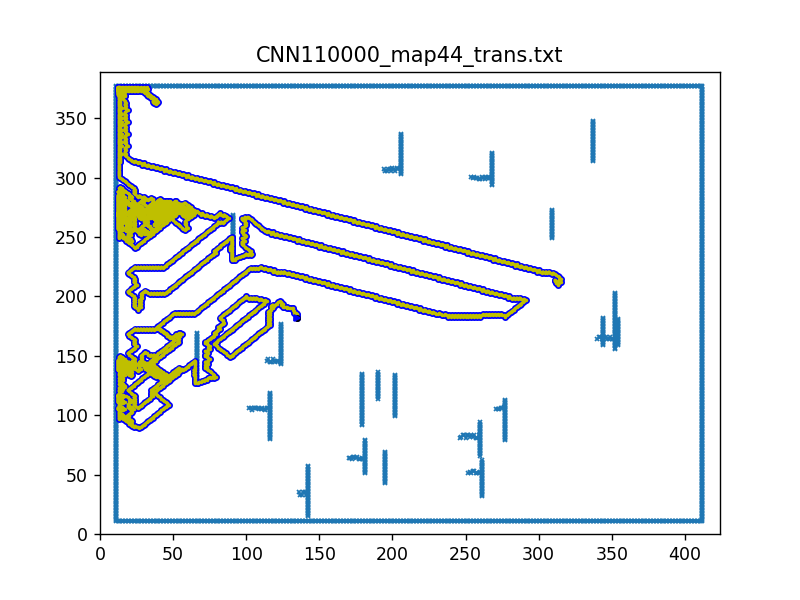

<IPython.core.display.Javascript object>


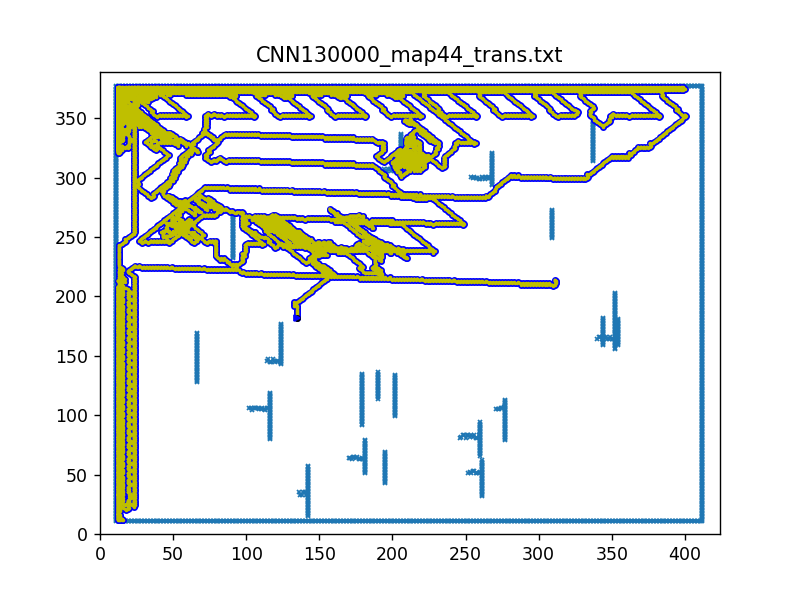

<IPython.core.display.Javascript object>


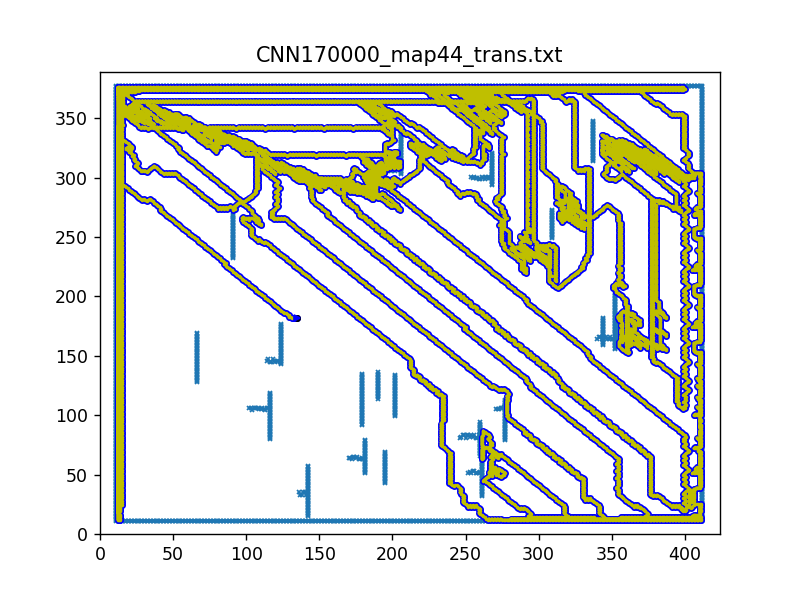

<IPython.core.display.Javascript object>


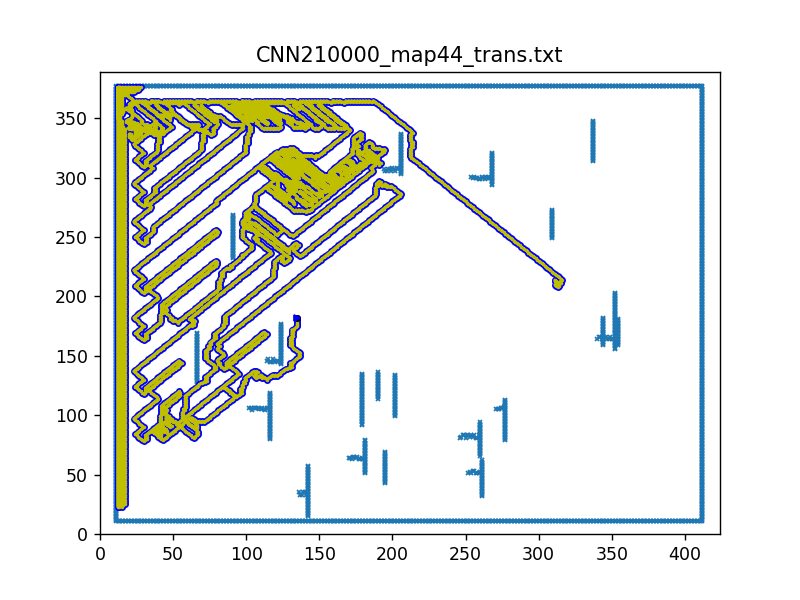

<IPython.core.display.Javascript object>


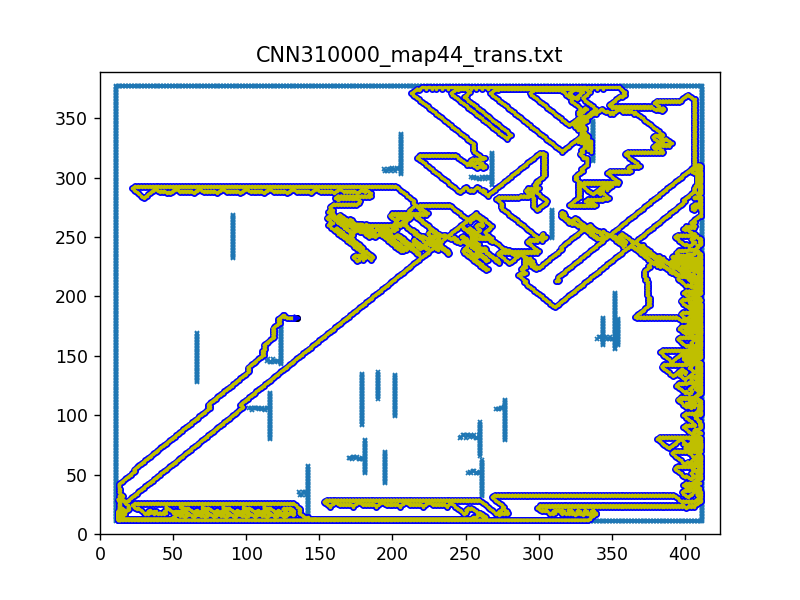

In [8]:
%matplotlib notebook
Model_path = ["CNN70000.pt", "CNN80000.pt", "CNN90000.pt", "CNN100000.pt", "CNN110000.pt","CNN130000.pt","CNN170000.pt","CNN210000.pt", "CNN310000.pt"]
Map_path = [f"Maps/map{i}_trans.txt" for i in range(40,45)]

for map_p in Map_path:
    for model_p in Model_path:
        try:   # If there exist '/'
            idx = map_p.index('/') 
            map_name = map_p[idx + 1:]
        except:  # If not
            map_name = map_p
        
        txt_path = f"Record_Action/{model_p[:-3]}_{map_name[:-4]}.txt"
        loaded_batch_action = np.genfromtxt(txt_path,delimiter=',',filling_values=0)[:-1]
        Map = Environment(map_p,False)
        Map.obs_plot(loaded_batch_action, txt_path[txt_path.index('/')+1:], False) 